<Figure size 1200x800 with 0 Axes>

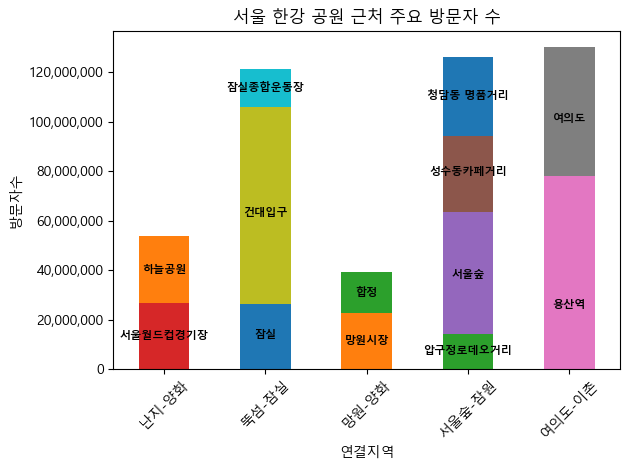

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 경로
file_path = 'hotplace_df_newer.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='cp949')

# 그룹별 방문자 수 합산
group_mapping = {
    '뚝섬-잠실': ['잠실', '건대입구', '잠실종합운동장'],
    '서울숲-잠원': ['압구정로데오거리', '서울숲', '성수동카페거리', '청담동 명품거리'],
    '여의도-이촌': ['용산역', '여의도'],
    '망원-양화': ['망원시장', '합정'],
    '난지-양화': ['서울월드컵경기장', '하늘공원']
}

# 각 그룹의 데이터 프레임을 쌓아줌
stacked_df = pd.DataFrame()
for group, locations in group_mapping.items():
    temp_df = df[df['지자체'].isin(locations)]
    stacked_df = pd.concat([stacked_df, temp_df])

# 지역명을 그룹명으로 변경
stacked_df['그룹명'] = stacked_df['지자체'].map({location: group for group, locations in group_mapping.items() for location in locations})

# 데이터를 피벗하여 막대 그래프로 그림
pivot_df = stacked_df.pivot_table(index='그룹명', columns='지자체', values='방문자수', aggfunc='sum')

# 그래프 크기 조절
plt.figure(figsize=(12, 8))

ax = pivot_df.plot(kind='bar', stacked=True)

# 그래프 제목, 축 레이블 설정
plt.title('서울 한강 공원 근처 주요 방문자 수')
plt.xlabel('연결지역')
plt.ylabel('방문자수')

# x축 라벨 회전
plt.xticks(rotation=45)

# 범례 제거
plt.legend().remove()

# y축을 실제 방문자수 수치로 변경
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# 각 막대 영역 중앙에 지역 표시
for idx, group in enumerate(pivot_df.index):
    locations = group_mapping[group]
    total_height = pivot_df.loc[group].sum()
    height_offset = 0
    for loc in locations:
        height = pivot_df[loc].sum()
        if loc == '잠실':
            plt.text(idx, height_offset + height / 2 - 26000000, loc, ha='center', va='center', color='black', fontsize=8, weight='bold')
        elif loc == '건대입구':
              plt.text(idx, height_offset + height / 2 - 30000000, loc, ha='center', va='center', color='black', fontsize=8, weight='bold')
        elif loc == '압구정로데오거리':
              plt.text(idx, height_offset + height / 2 - 8000000, loc, ha='center', va='center', color='black', fontsize=8, weight='bold')
        elif loc == '성수동카페거리':
              plt.text(idx, height_offset + height / 2 + 10000000, loc, ha='center', va='center', color='black', fontsize=8, weight='bold')
        elif loc == '여의도':
              plt.text(idx, height_offset + height / 2 + 10000000, loc, ha='center', va='center', color='black', fontsize=8, weight='bold')
        else:
            plt.text(idx, height_offset + height / 2, loc, ha='center', va='center', color='black', fontsize=8, weight='bold')
        height_offset += height

# 그래프 출력
plt.tight_layout()
plt.show()


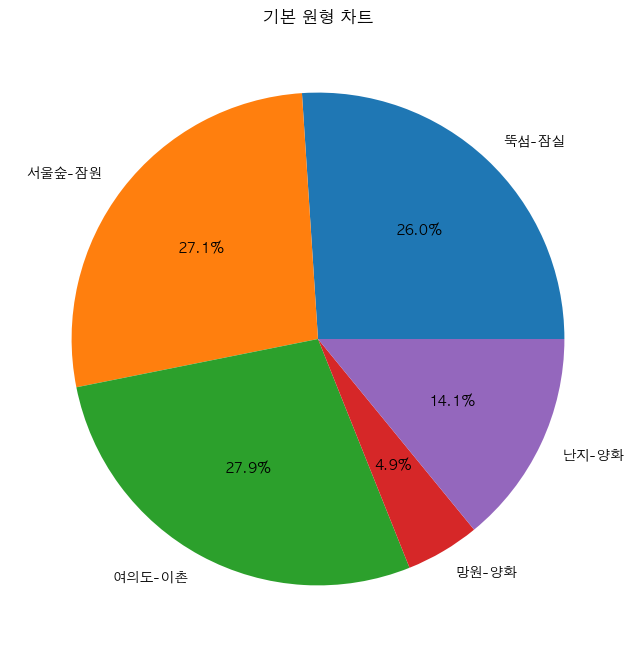

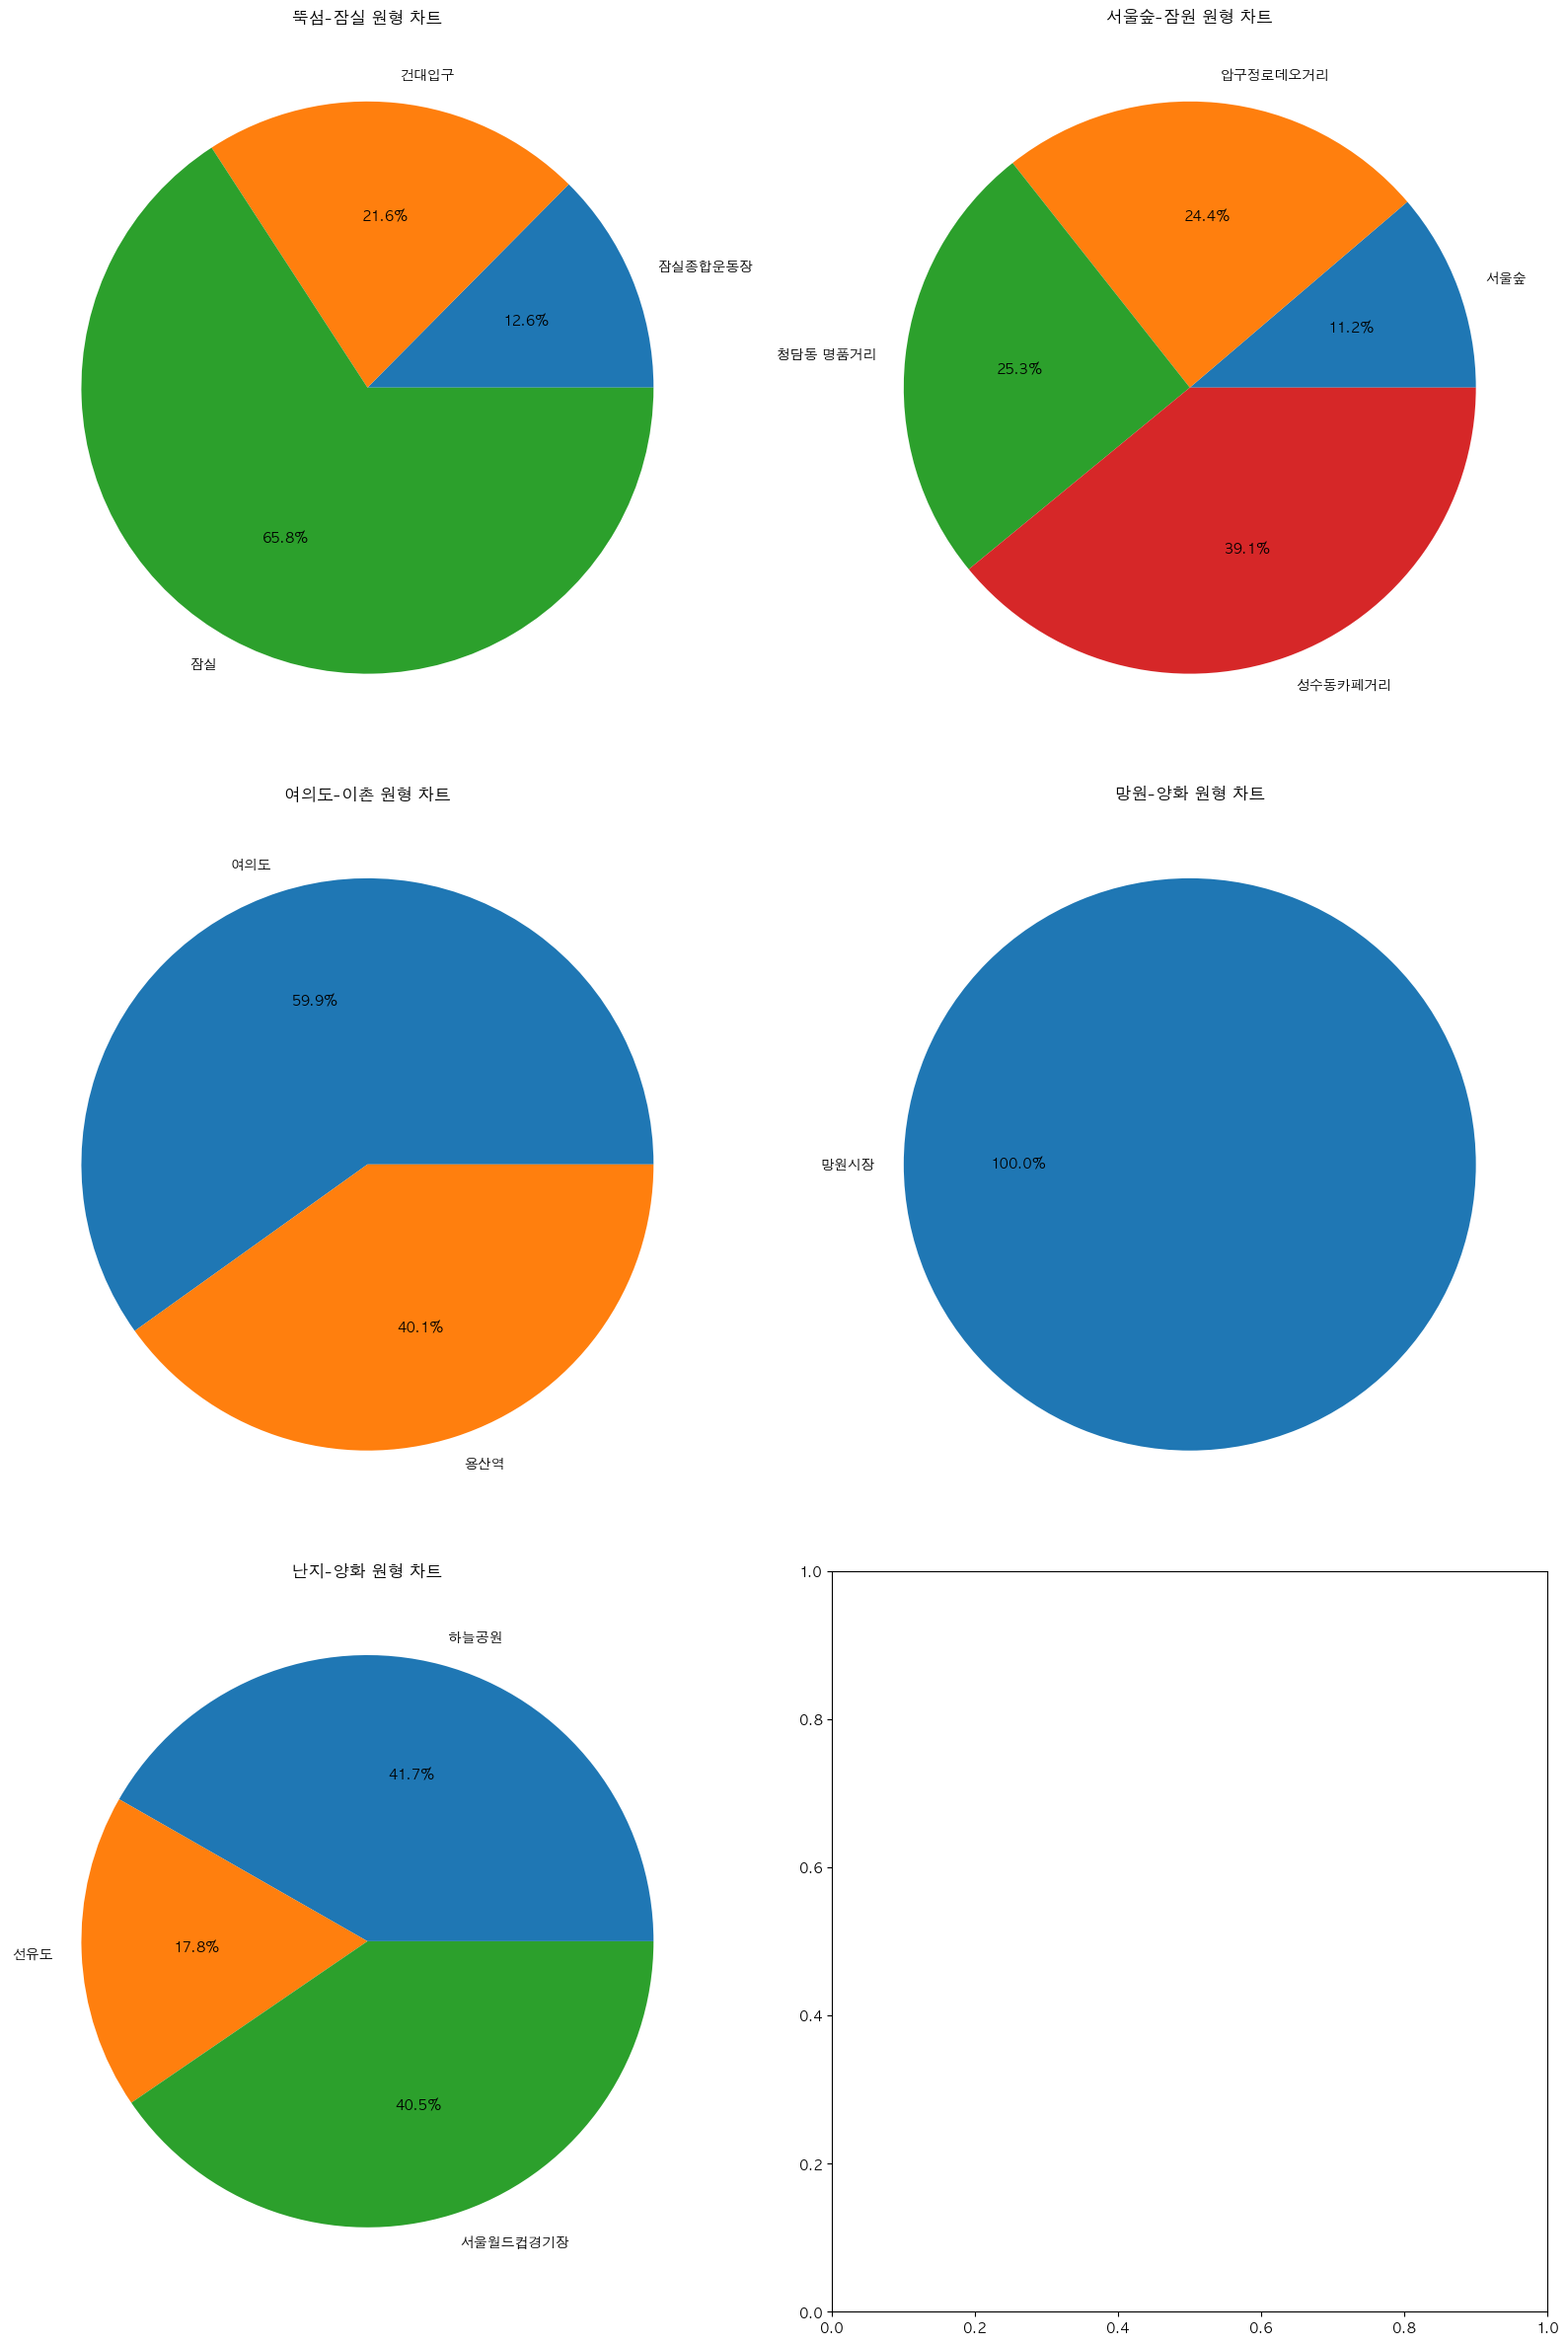

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로
file_path = 'hotplace_df.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='utf-8')

# 지자체 그룹별 방문자수 합산
group_mapping = {
    '뚝섬-잠실': ['잠실', '건대입구', '잠실종합운동장'],
    '서울숲-잠원': ['압구정로데오거리', '서울숲', '성수동카페거리', '청담동 명품거리'],
    '여의도-이촌': ['이촌', '용산역', '여의도'],
    '망원-양화': ['합정', '망원시장'],
    '난지-양화': ['서울월드컵경기장', '선유도', '하늘공원']
}

group_sums = {group: df[df['지자체'].isin(locations)]['방문자수'].sum() for group, locations in group_mapping.items()}

# 기본 원형 차트 생성
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(group_sums.values(), labels=group_sums.keys(), autopct='%1.1f%%')
ax.set_title('기본 원형 차트')

# 섹션을 확대하는 원형 차트 생성
fig, axes = plt.subplots(3, 2, figsize=(16, 24))
axes = axes.flatten()

for i, (group, locations) in enumerate(group_mapping.items()):
    sub_data = df[df['지자체'].isin(locations)]
    axes[i].pie(sub_data['방문자수'], labels=sub_data['지자체'], autopct='%1.1f%%')
    axes[i].set_title(f'{group} 원형 차트')

plt.tight_layout()
plt.show()


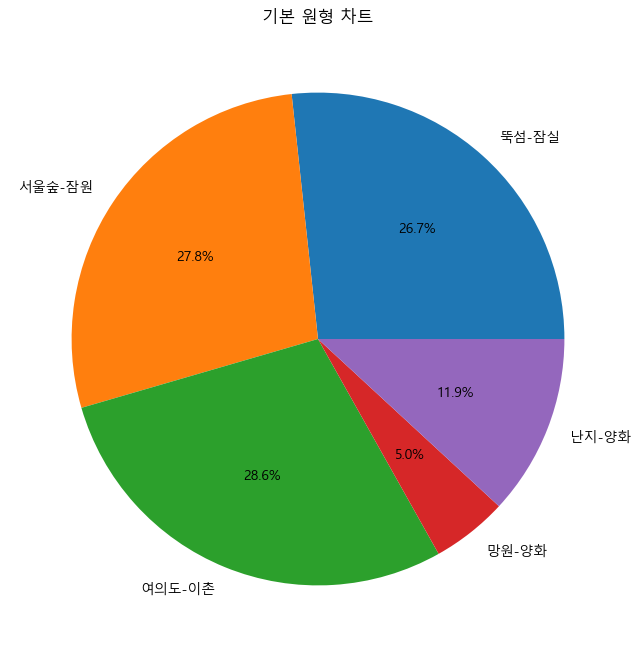

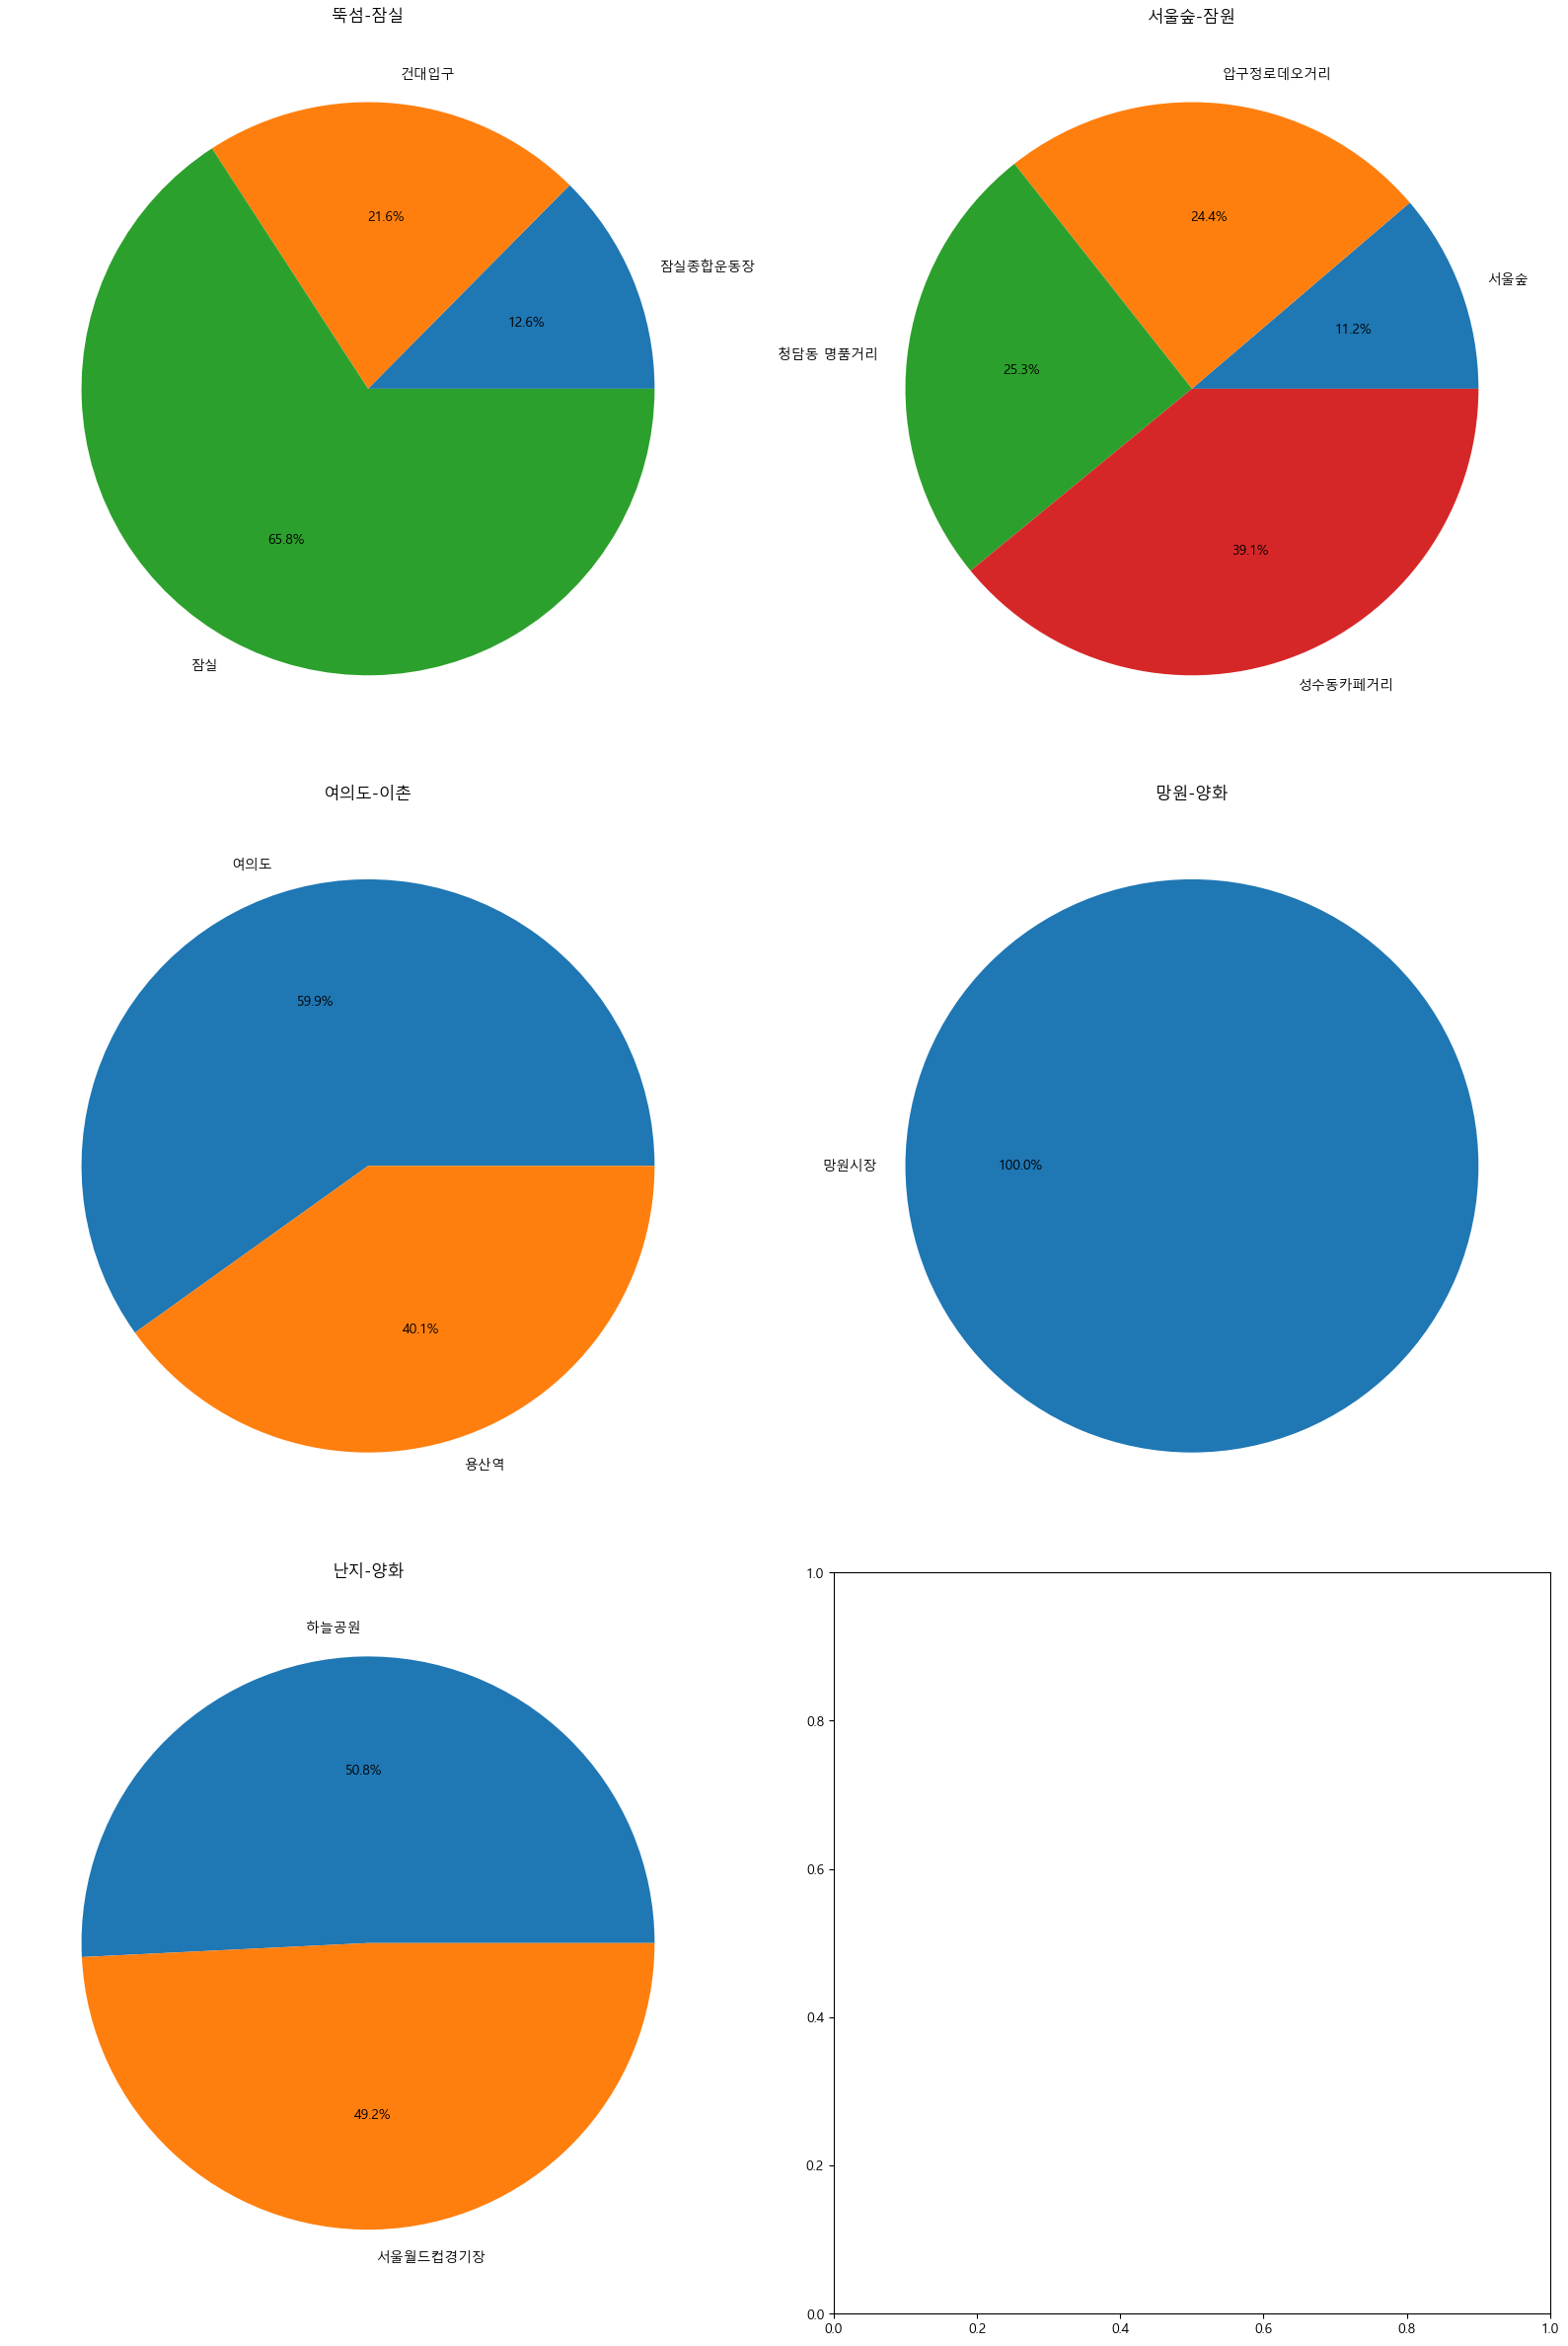

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 경로
file_path = 'hotplace_df_new.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='utf-8')

# 지자체 그룹별 방문자수 합산
group_mapping = {
    '뚝섬-잠실': ['잠실', '건대입구', '잠실종합운동장'],
    '서울숲-잠원': ['압구정로데오거리', '서울숲', '성수동카페거리', '청담동 명품거리'],
    '여의도-이촌': ['이촌', '용산역', '여의도'],
    '망원-양화': ['망원시장'],
    '난지-양화': ['서울월드컵경기장', '선유도', '하늘공원']
}

group_sums = {group: df[df['지자체'].isin(locations)]['방문자수'].sum() for group, locations in group_mapping.items()}

# 기본 원형 차트 생성
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(group_sums.values(), labels=group_sums.keys(), autopct='%1.1f%%')
ax.set_title('기본 원형 차트')

# 섹션을 확대하는 원형 차트 생성
fig, axes = plt.subplots(3, 2, figsize=(16, 24))
axes = axes.flatten()

for i, (group, locations) in enumerate(group_mapping.items()):
    sub_data = df[df['지자체'].isin(locations)]
    axes[i].pie(sub_data['방문자수'], labels=sub_data['지자체'], autopct='%1.1f%%')
    axes[i].set_title(f'{group}')

plt.tight_layout()
plt.show()


In [4]:
import pandas as pd

df = pd.read_csv('한강공원 이용자.csv',encoding = 'cp949')
df

,구분,일반이용자,자전거 등,Unnamed: 3,Unnamed: 4,마라톤 등,Unnamed: 6,운동시설 등,기타,특화공원,합계
0,NaN,NaN,자전거,인라인,PM(개인형이동장치),마라톤,주요행사,NaN,NaN,NaN,NaN
1,광나루,"781,651","437,640","1,037","1,551","9,094","5,800","305,281","119,749",0,"1,661,803"
2,잠실,"1,478,020","2,018,979","1,888","9,521","121,770","8,600","183,849","25,828",0,"3,848,455"
3,뚝섬,"4,105,010","1,312,898","22,336","25,141","170,030","295,139","2,060,190","232,547","817,649","9,040,940"
4,잠원,"1,174,447","480,552","13,043",0,"110,795","18,400","474,401","593,763","63,874","2,929,275"
5,반포,"5,111,800","2,142,479","4,809","14,081","42,726","134,975","474,838","156,058","3,494,104","11,575,870"
6,이촌,"1,440,135","854,841","1,320","3,262","60,946","11,650","381,383","227,453","34,560","3,015,550"
7,여의도,"3,702,707","350,252","52,540",0,"264,460","252,795","236,014","738,930","4,044,394","9,642,092"
8,양화,"1,827,689","734,398","9,899","30,169","99,564","2,400","364,636","22,435",0,"3,091,190"
9,난지,"549,541","514,546","7,325","7,989","87,196","145,840","215,443","137,006","654,810","2,319,696"


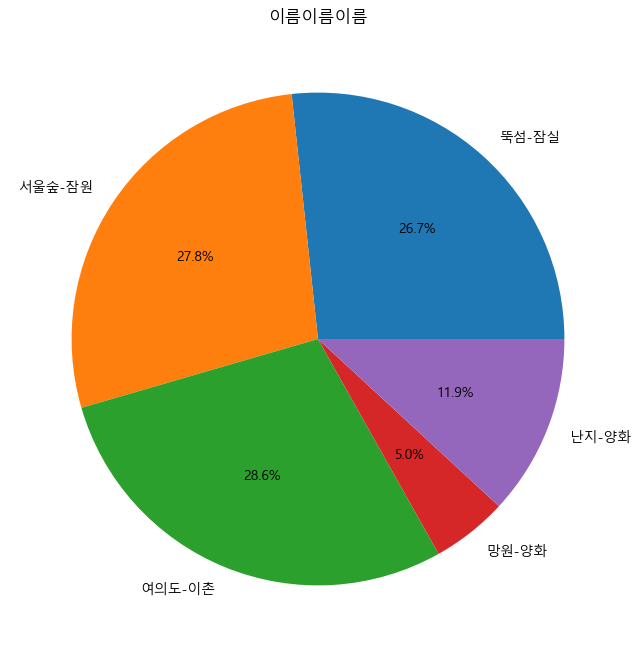

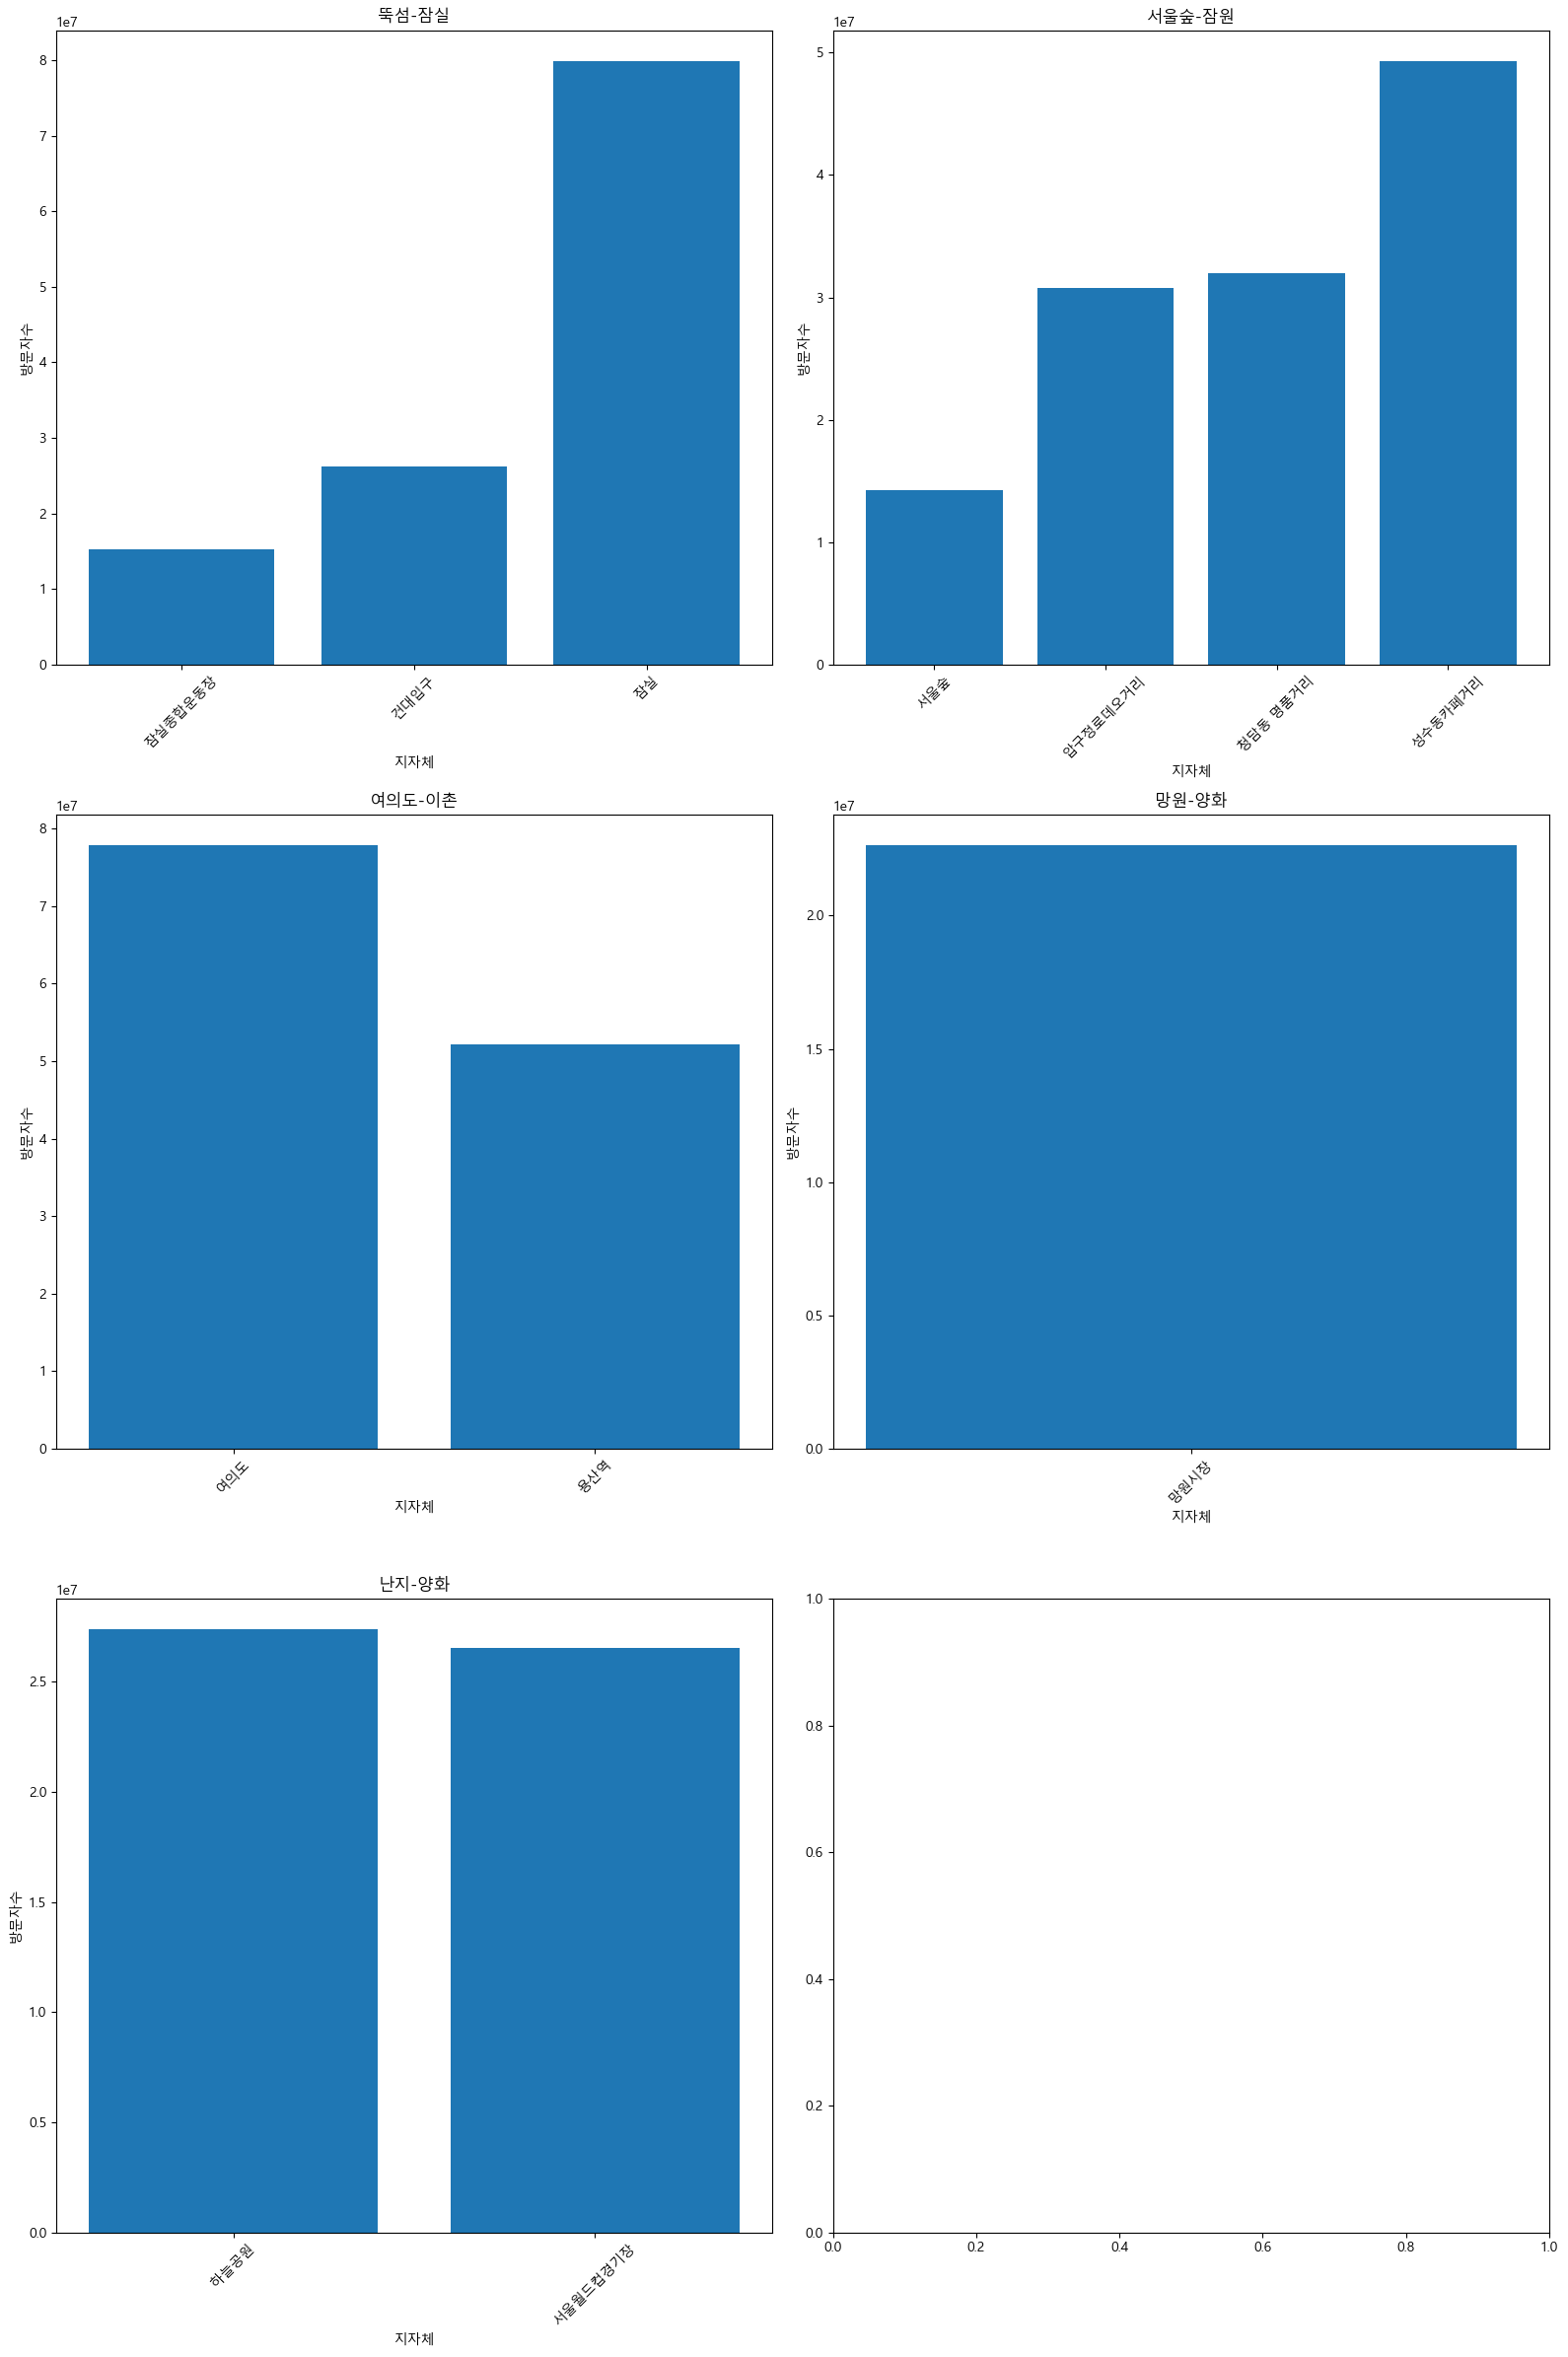

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 경로
file_path = 'hotplace_df_new.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='utf-8')

# 지자체 그룹별 방문자수 합산
group_mapping = {
    '뚝섬-잠실': ['잠실', '건대입구', '잠실종합운동장'],
    '서울숲-잠원': ['압구정로데오거리', '서울숲', '성수동카페거리', '청담동 명품거리'],
    '여의도-이촌': ['이촌', '용산역', '여의도'],
    '망원-양화': ['합정', '망원시장'],
    '난지-양화': ['서울월드컵경기장', '선유도', '하늘공원']
}

group_sums = {group: df[df['지자체'].isin(locations)]['방문자수'].sum() for group, locations in group_mapping.items()}

# 기본 원형 차트 생성
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(group_sums.values(), labels=group_sums.keys(), autopct='%1.1f%%')
ax.set_title('이름이름이름')

# 섹션을 확대하는 막대 차트 생성
fig, axes = plt.subplots(3, 2, figsize=(16, 24))
axes = axes.flatten()

for i, (group, locations) in enumerate(group_mapping.items()):
    sub_data = df[df['지자체'].isin(locations)]
    axes[i].bar(sub_data['지자체'], sub_data['방문자수'])
    axes[i].set_title(f'{group}')
    axes[i].set_xlabel('지자체')
    axes[i].set_ylabel('방문자수')
    for tick in axes[i].get_xticklabels():
        tick.set_rotation(45)

plt.tight_layout()
plt.show()


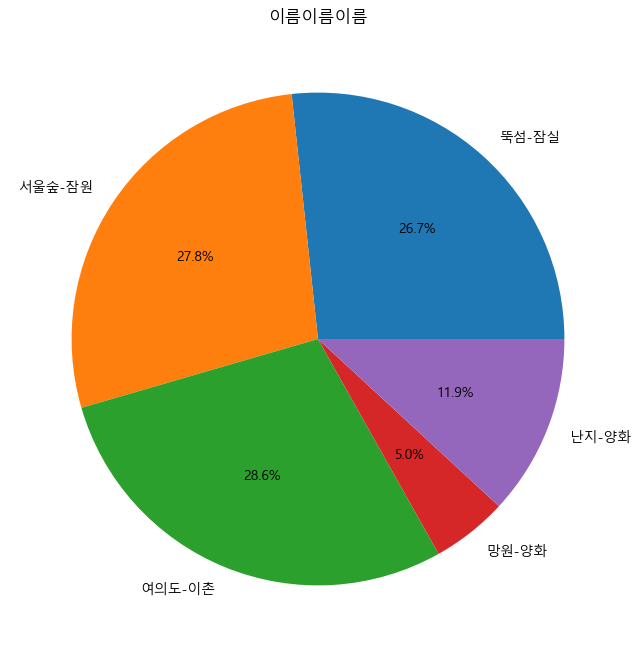

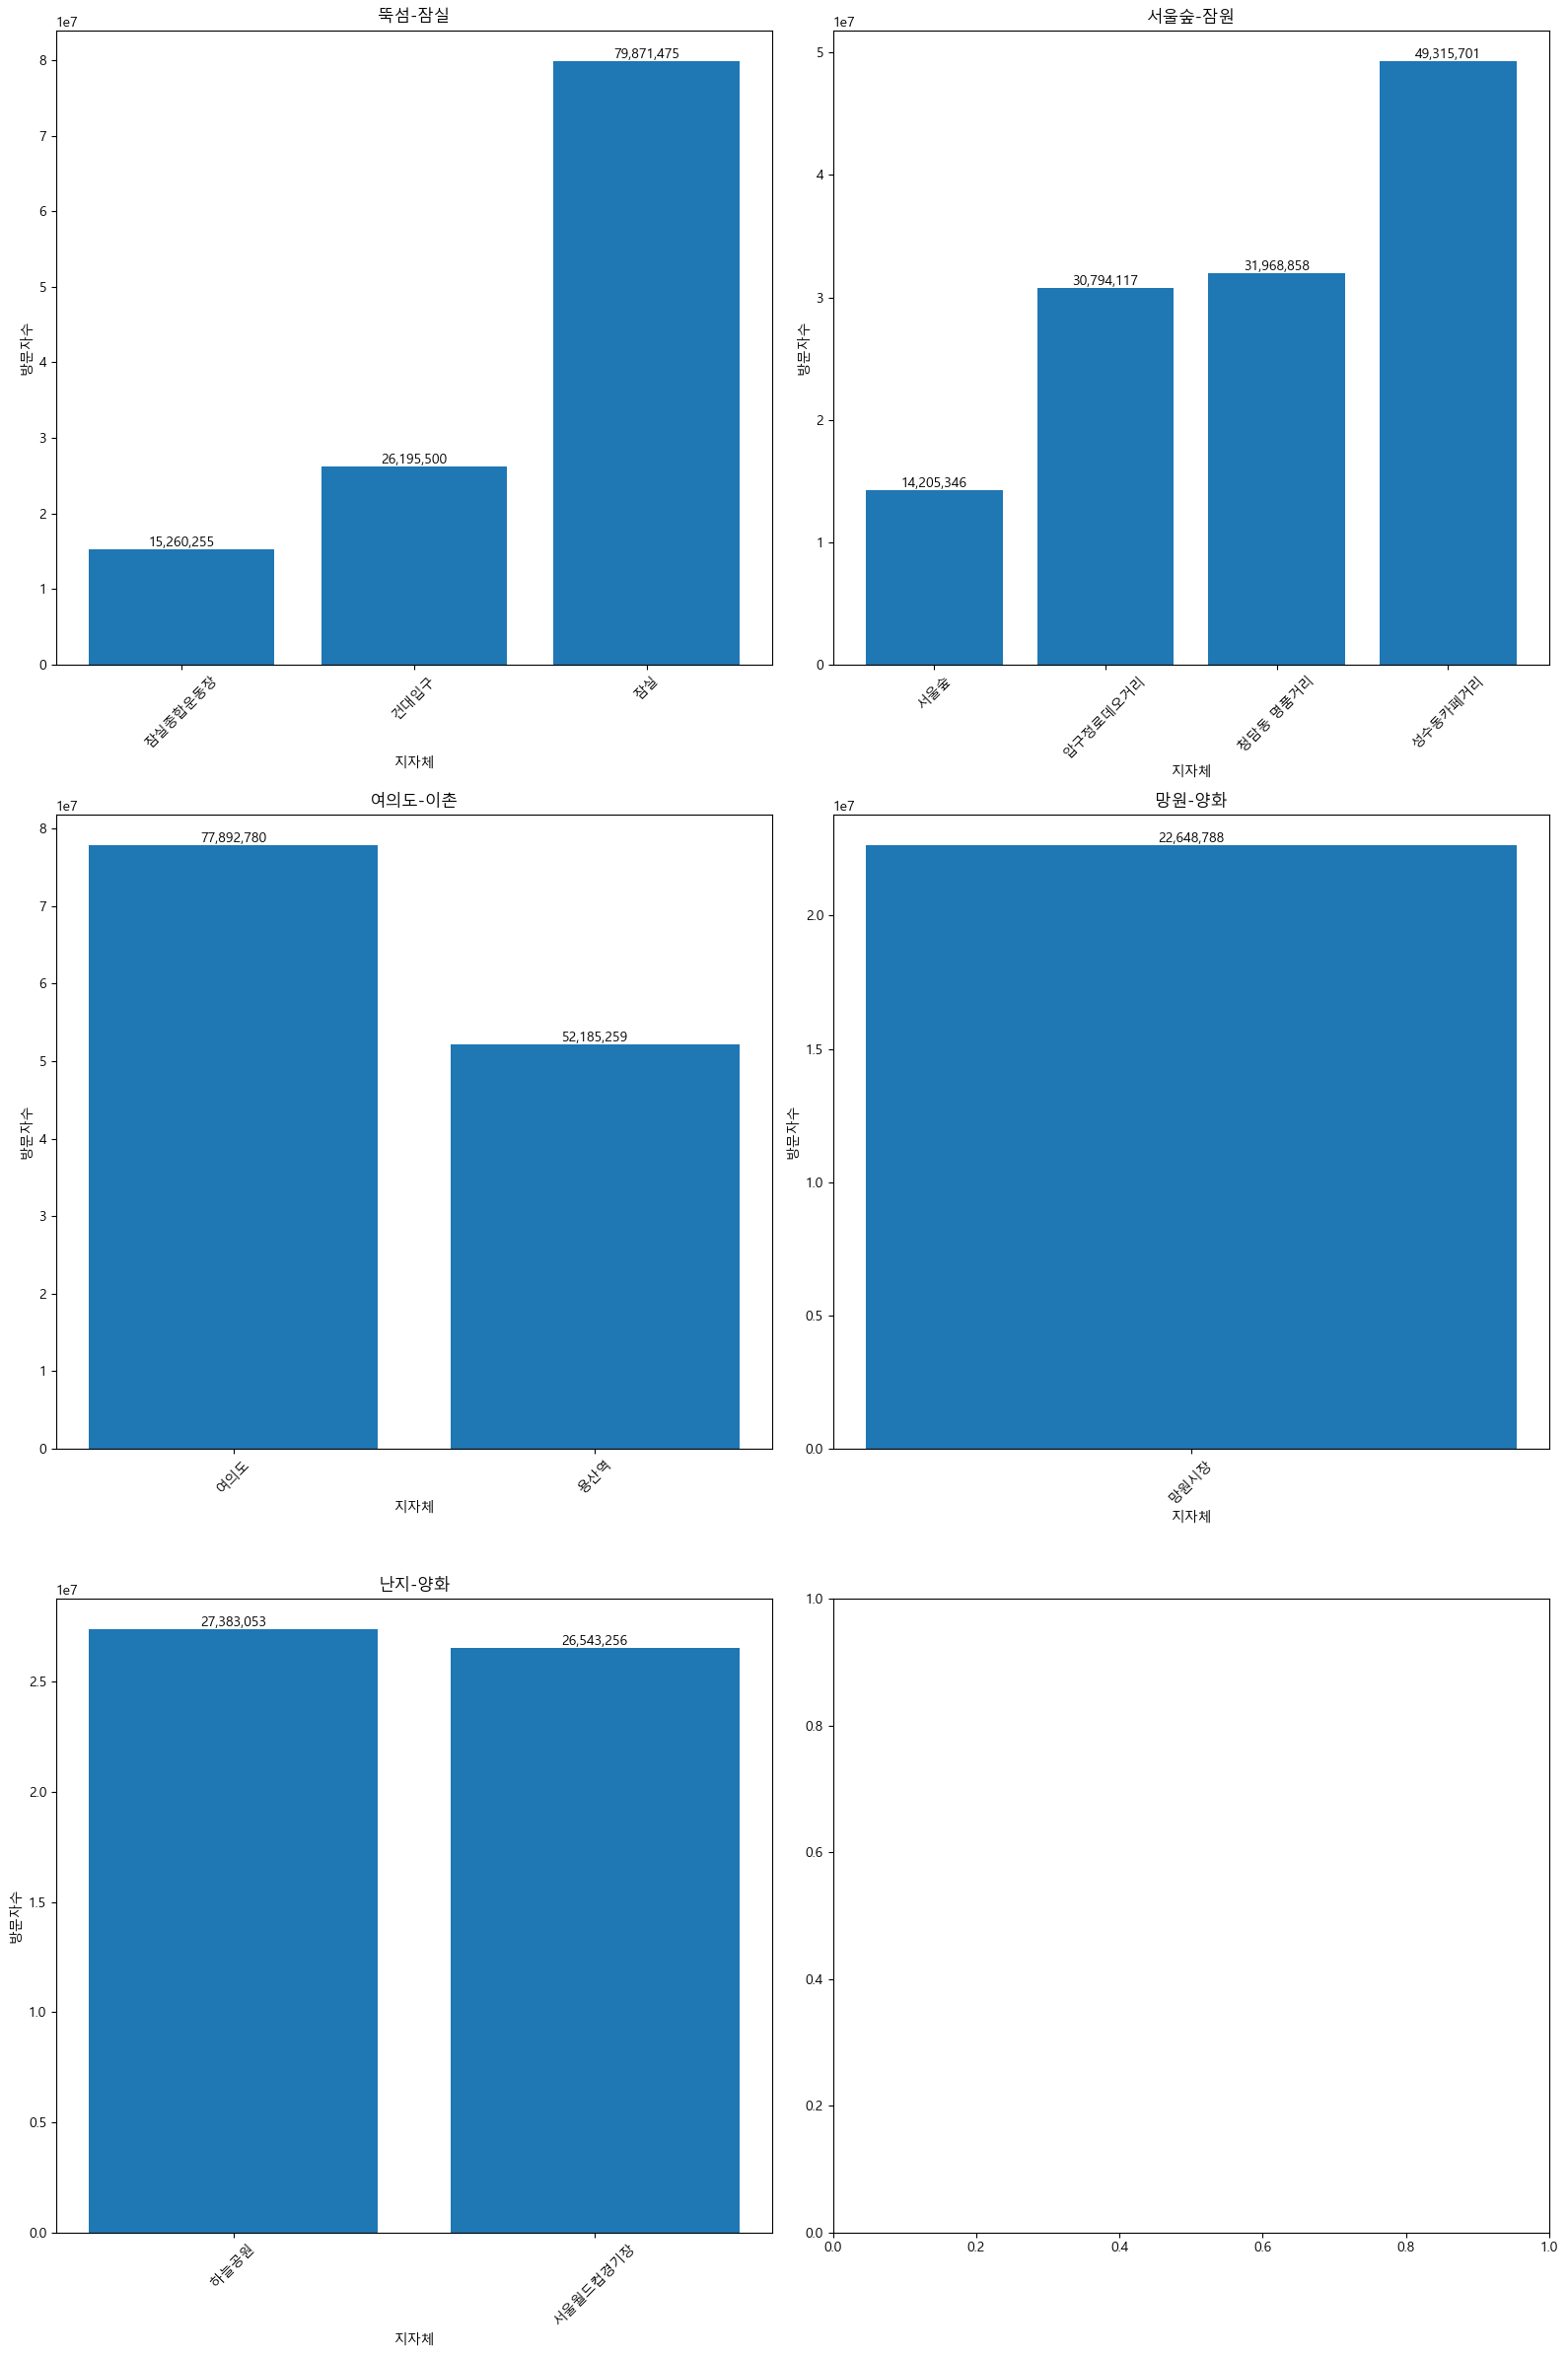

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 경로
file_path = 'hotplace_df_new.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='utf-8')

# 지자체 그룹별 방문자수 합산
group_mapping = {
    '뚝섬-잠실': ['잠실', '건대입구', '잠실종합운동장'],
    '서울숲-잠원': ['압구정로데오거리', '서울숲', '성수동카페거리', '청담동 명품거리'],
    '여의도-이촌': ['이촌', '용산역', '여의도'],
    '망원-양화': ['합정', '망원시장'],
    '난지-양화': ['서울월드컵경기장', '선유도', '하늘공원']
}

group_sums = {group: df[df['지자체'].isin(locations)]['방문자수'].sum() for group, locations in group_mapping.items()}

# 기본 원형 차트 생성
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(group_sums.values(), labels=group_sums.keys(), autopct='%1.1f%%')
ax.set_title('이름이름이름')

# 섹션을 확대하는 막대 차트 생성
fig, axes = plt.subplots(3, 2, figsize=(16, 24))
axes = axes.flatten()

for i, (group, locations) in enumerate(group_mapping.items()):
    sub_data = df[df['지자체'].isin(locations)]
    bars = axes[i].bar(sub_data['지자체'], sub_data['방문자수'])
    axes[i].set_title(f'{group}')
    axes[i].set_xlabel('지자체')
    axes[i].set_ylabel('방문자수')
    for tick in axes[i].get_xticklabels():
        tick.set_rotation(45)
    # 막대 위에 방문자수 표시
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width() / 2, height, f'{int(height):,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


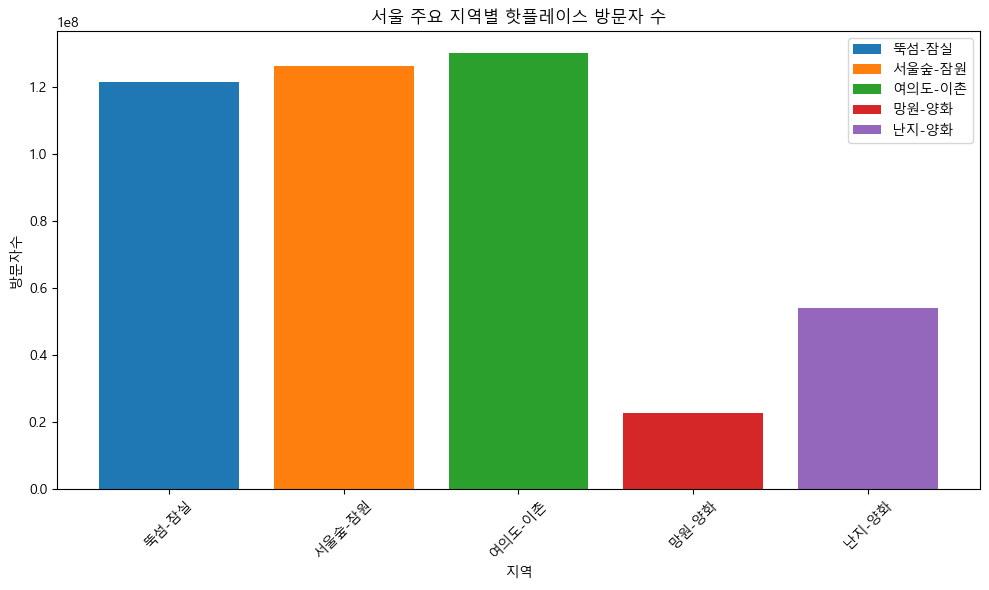

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 경로
file_path = 'hotplace_df_new.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='utf-8')

plt.figure(figsize=(10, 6))

# 그룹별 방문자수 합산
group_mapping = {
    '뚝섬-잠실': ['잠실', '건대입구', '잠실종합운동장'],
    '서울숲-잠원': ['압구정로데오거리', '서울숲', '성수동카페거리', '청담동 명품거리'],
    '여의도-이촌': ['이촌', '용산역', '여의도'],
    '망원-양화': ['망원시장'],
    '난지-양화': ['서울월드컵경기장', '선유도', '하늘공원']
}

for group, locations in group_mapping.items():
    temp_df = df[df['지자체'].isin(locations)]
    plt.bar(group, temp_df['방문자수'].sum(), label=group)

# 그래프 제목, 축 레이블 설정
plt.title('서울 주요 지역별 핫플레이스 방문자 수')
plt.xlabel('지역')
plt.ylabel('방문자수')

# x축 라벨 회전
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


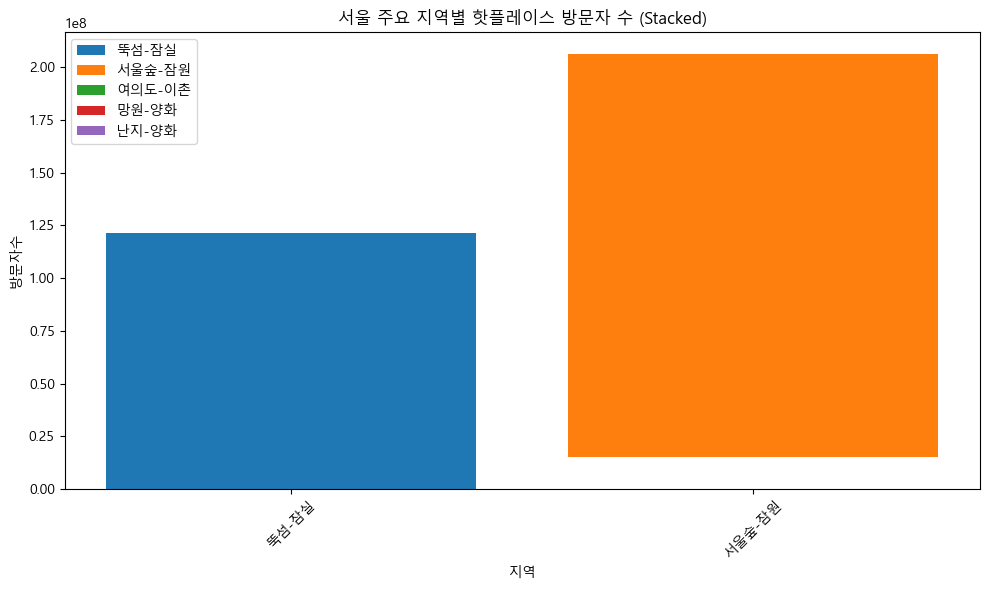

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 경로
file_path = 'hotplace_df_new.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='utf-8')

plt.figure(figsize=(10, 6))

# 그룹별 방문자수 합산
group_mapping = {
    '뚝섬-잠실': ['잠실', '건대입구', '잠실종합운동장'],
    '서울숲-잠원': ['압구정로데오거리', '서울숲', '성수동카페거리', '청담동 명품거리'],
    '여의도-이촌': ['이촌', '용산역', '여의도'],
    '망원-양화': ['망원시장'],
    '난지-양화': ['서울월드컵경기장', '선유도', '하늘공원']
}

# stacked 막대 그래프 생성
bottom = None

for group, locations in group_mapping.items():
    temp_df = df[df['지자체'].isin(locations)]
    plt.bar(group, temp_df['방문자수'].sum(), label=group, bottom=bottom)
    if bottom is None:
        bottom = temp_df['방문자수']
    else:
        bottom += temp_df['방문자수']

# 그래프 제목, 축 레이블 설정
plt.title('서울 주요 지역별 핫플레이스 방문자 수 (Stacked)')
plt.xlabel('지역')
plt.ylabel('방문자수')

# x축 라벨 회전
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


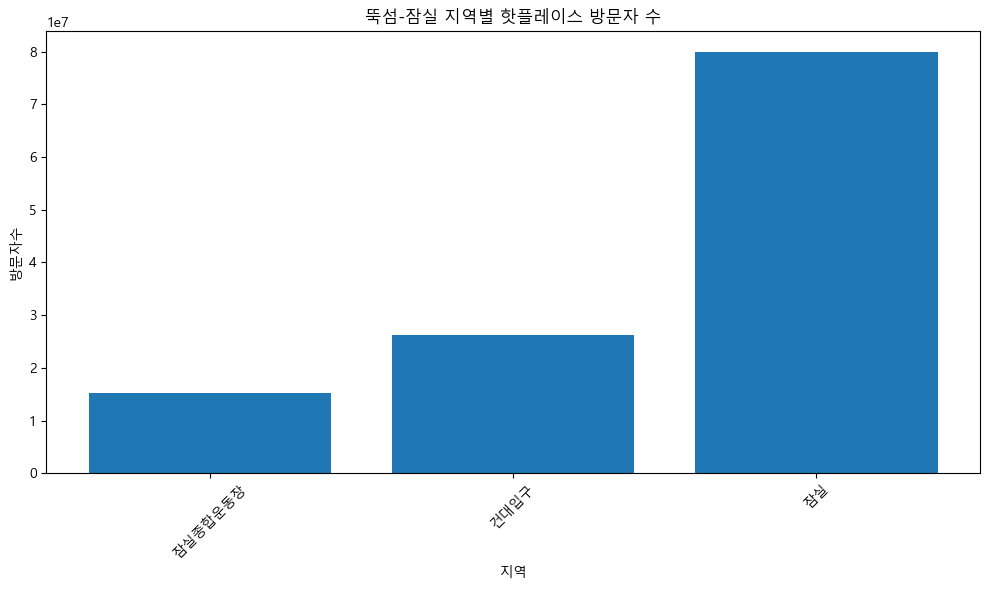

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 경로
file_path = 'hotplace_df_new.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='utf-8')

plt.figure(figsize=(10, 6))

# '뚝섬-잠실' 그룹 데이터 필터링
group_name = '뚝섬-잠실'
locations = ['잠실', '건대입구', '잠실종합운동장']
temp_df = df[df['지자체'].isin(locations)]

# 막대 그래프 생성
plt.bar(temp_df['지자체'], temp_df['방문자수'])

# 그래프 제목, 축 레이블 설정
plt.title(f'{group_name} 지역별 핫플레이스 방문자 수')
plt.xlabel('지역')
plt.ylabel('방문자수')

# x축 라벨 회전
plt.xticks(rotation=45)

# 그래프 출력
plt.tight_layout()
plt.show()


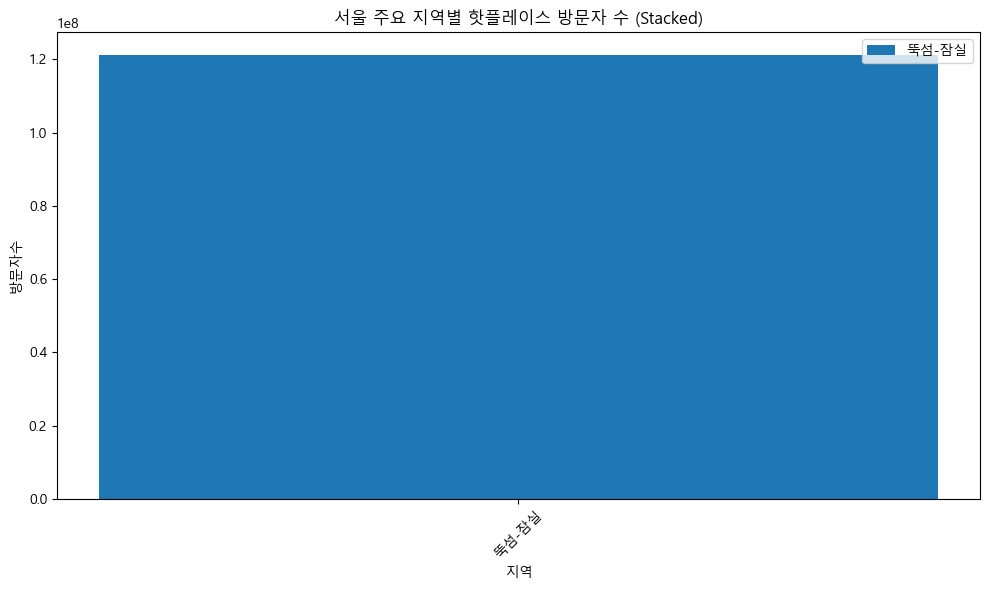

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 경로
file_path = 'hotplace_df_new.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='utf-8')

plt.figure(figsize=(10, 6))

# '뚝섬-잠실' 그룹 데이터 필터링
group_name = '뚝섬-잠실'
locations = ['잠실', '건대입구', '잠실종합운동장']
temp_df = df[df['지자체'].isin(locations)]

# 막대 그래프 생성
plt.bar(group_name, temp_df['방문자수'].sum(), label=group_name)

# 그래프 제목, 축 레이블 설정
plt.title('서울 주요 지역별 핫플레이스 방문자 수 (Stacked)')
plt.xlabel('지역')
plt.ylabel('방문자수')

# x축 라벨 회전
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


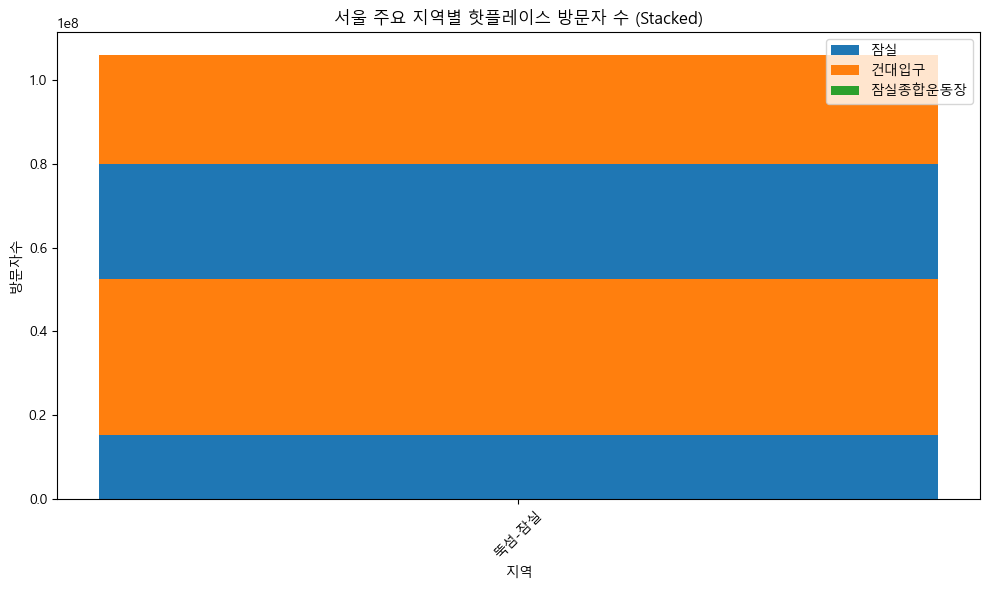

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 경로
file_path = 'hotplace_df_new.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='utf-8')

plt.figure(figsize=(10, 6))

# '뚝섬-잠실' 그룹 데이터 필터링
group_name = '뚝섬-잠실'
locations = ['잠실', '건대입구', '잠실종합운동장']
temp_df = df[df['지자체'].isin(locations)]

# 막대 그래프 생성
plt.bar(group_name, temp_df['방문자수'], label=locations[0])
bottom = temp_df['방문자수']
for location in locations[1:]:
    plt.bar(group_name, temp_df[temp_df['지자체'] == location]['방문자수'], bottom=bottom, label=location)
    bottom += temp_df[temp_df['지자체'] == location]['방문자수']

# 그래프 제목, 축 레이블 설정
plt.title('서울 주요 지역별 핫플레이스 방문자 수 (Stacked)')
plt.xlabel('지역')
plt.ylabel('방문자수')

# x축 라벨 회전
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


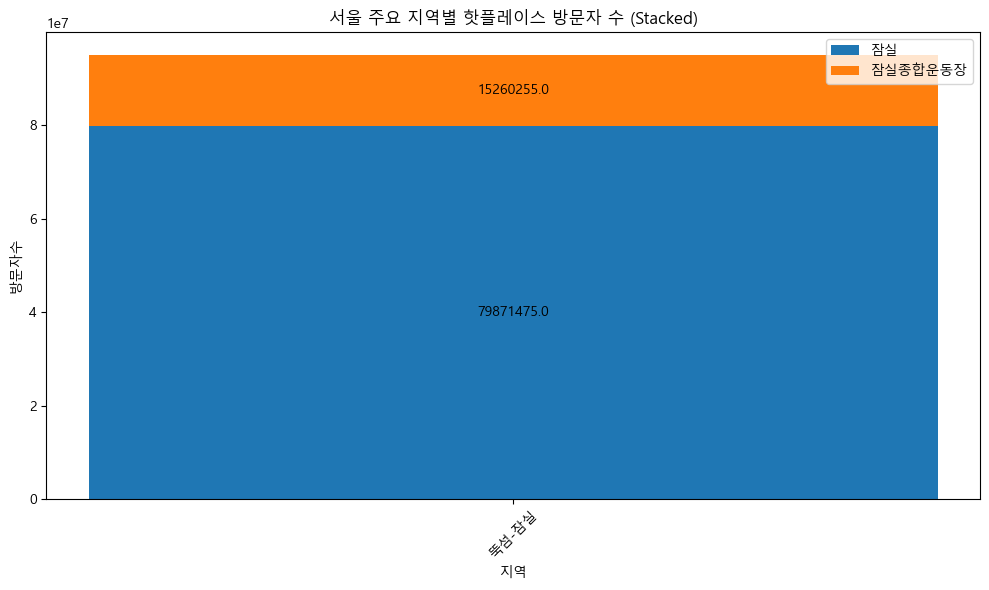

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 경로
file_path = 'hotplace_df_new.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='utf-8')

plt.figure(figsize=(10, 6))

# '뚝섬-잠실' 그룹 데이터 필터링
group_name = '뚝섬-잠실'
locations = ['잠실', '잠실종합운동장']
temp_df = df[df['지자체'].isin(locations)]

# 막대 그래프 생성
bottom = 0  # 맨 아래 막대의 위치
for location in locations:
    temp_data = temp_df[temp_df['지자체'] == location]
    plt.bar(group_name, temp_data['방문자수'], bottom=bottom, label=location)
    for idx, val in enumerate(temp_data['방문자수']):
        plt.text(group_name, bottom + val / 2, f'{val}', ha='center', va='center')
    bottom += temp_data['방문자수']

# 그래프 제목, 축 레이블 설정
plt.title('서울 주요 지역별 핫플레이스 방문자 수 (Stacked)')
plt.xlabel('지역')
plt.ylabel('방문자수')

# x축 라벨 회전
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


In [27]:
# '잠실', '건대입구', '잠실종합운동장' 데이터 출력
locations = ['잠실', '건대입구', '잠실종합운동장']
temp_df = df[df['지자체'].isin(locations)]
print(temp_df)


        지자체        방문자수
10  잠실종합운동장  15260255.0
14     건대입구  26195500.0
16       잠실  79871475.0


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
posx and posy should be finite values
posx and posy should be finite values


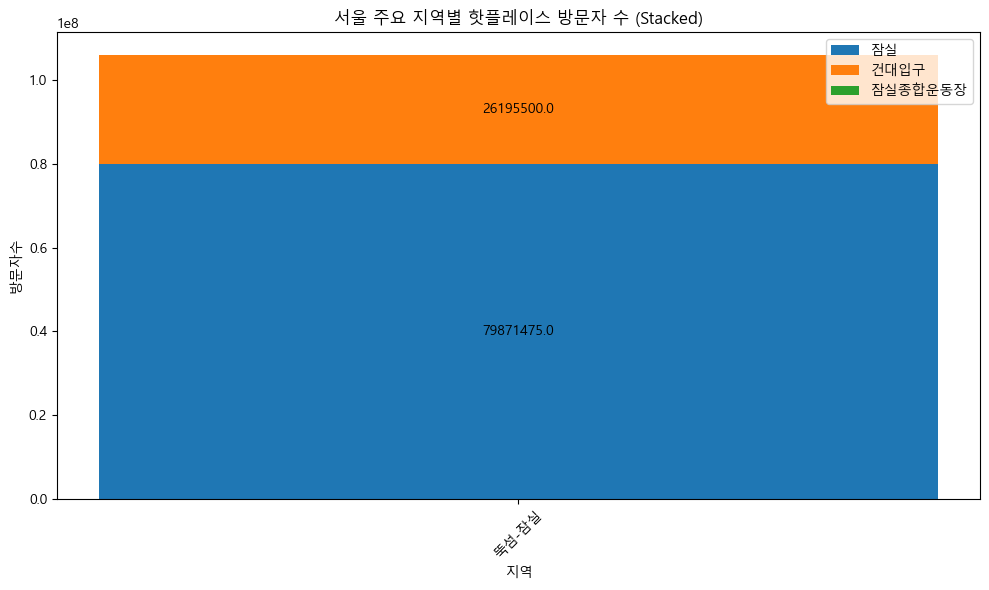

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 경로
file_path = 'hotplace_df_new.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='utf-8')

plt.figure(figsize=(10, 6))

# '뚝섬-잠실' 그룹 데이터 필터링
group_name = '뚝섬-잠실'
locations = ['잠실', '건대입구', '잠실종합운동장']
temp_df = df[df['지자체'].isin(locations)]

# 막대 그래프 생성
bottom = 0  # 맨 아래 막대의 위치
for location in locations:
    temp_data = temp_df[temp_df['지자체'] == location]
    plt.bar(group_name, temp_data['방문자수'], bottom=bottom, label=location)
    for idx, val in enumerate(temp_data['방문자수']):
        plt.text(group_name, bottom + val / 2, f'{val}', ha='center', va='center')
    bottom += temp_data['방문자수']

# 그래프 제목, 축 레이블 설정
plt.title('서울 주요 지역별 핫플레이스 방문자 수 (Stacked)')
plt.xlabel('지역')
plt.ylabel('방문자수')

# x축 라벨 회전
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 1 with shape (4,) and arg 3 with shape (3,).

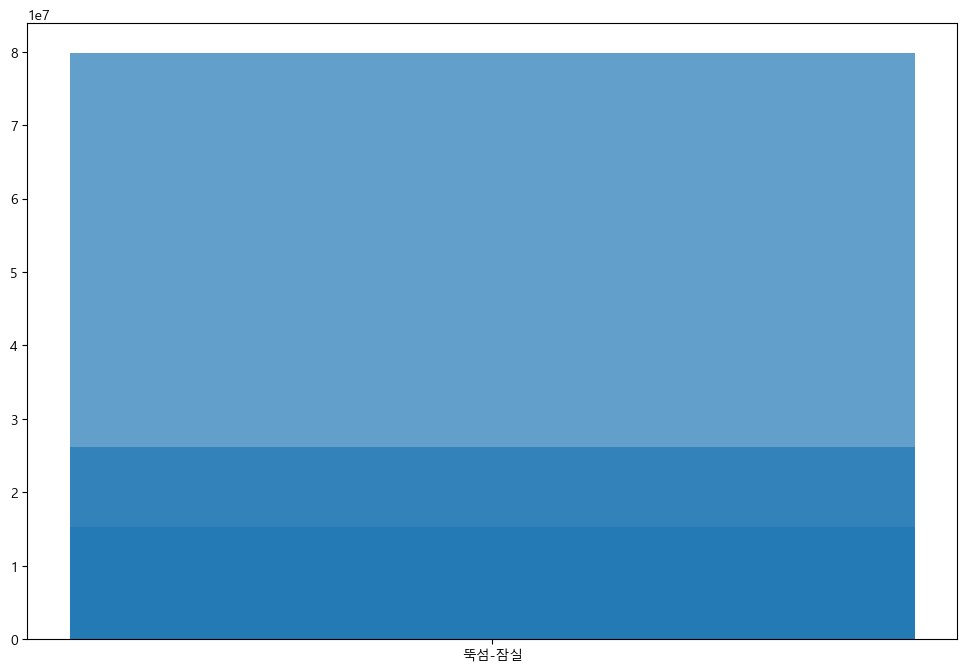

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 경로
file_path = 'hotplace_df_new.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='utf-8')

plt.figure(figsize=(12, 8))

# 그룹별로 데이터 묶기
group_mapping = {
    '뚝섬-잠실': ['잠실', '건대입구', '잠실종합운동장'],
    '서울숲-잠원': ['압구정로데오거리', '서울숲', '성수동카페거리', '청담동 명품거리'],
    '여의도-이촌': ['이촌', '용산역', '여의도'],
    '망원-양화': ['망원시장'],
    '난지-양화': ['서울월드컵경기장', '선유도', '하늘공원']
}

# 막대 그래프 생성
bottom = None
for group, locations in group_mapping.items():
    temp_df = df[df['지자체'].isin(locations)]
    if bottom is None:
        plt.bar(group, temp_df['방문자수'], label=group, alpha=0.7)
        bottom = temp_df['방문자수']
    else:
        plt.bar(group, temp_df['방문자수'], bottom=bottom, label=group, alpha=0.7)
        bottom += temp_df['방문자수']

# 그래프 제목, 축 레이블 설정
plt.title('서울 주요 지역별 핫플레이스 방문자 수 (Stacked)')
plt.xlabel('지역 그룹')
plt.ylabel('방문자수')

# x축 라벨 회전
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


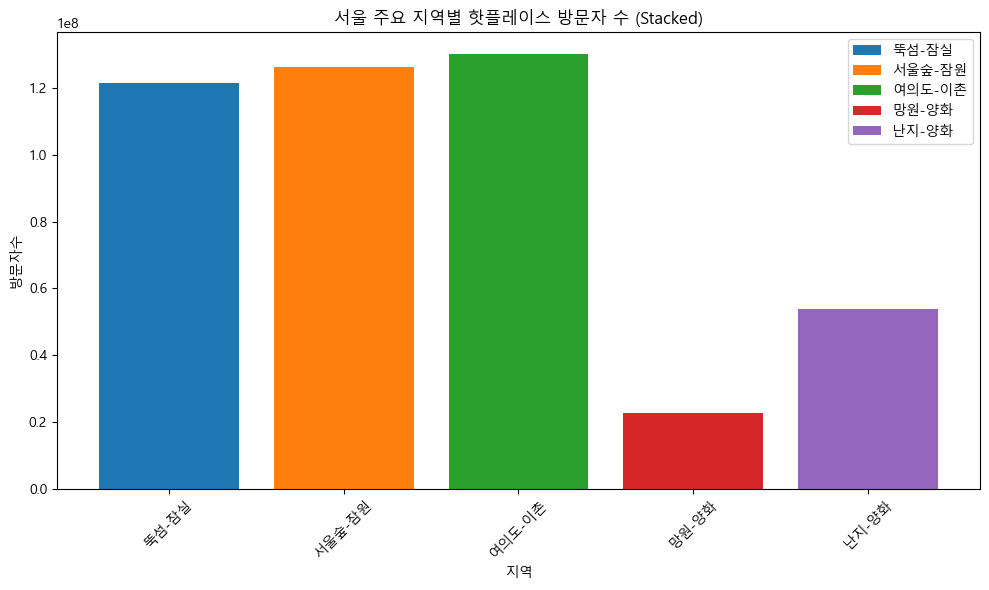

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 경로
file_path = 'hotplace_df_new.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='utf-8')

plt.figure(figsize=(10, 6))

# 그룹별 방문자수 합산
group_mapping = {
    '뚝섬-잠실': ['잠실', '건대입구', '잠실종합운동장'],
    '서울숲-잠원': ['압구정로데오거리', '서울숲', '성수동카페거리', '청담동 명품거리'],
    '여의도-이촌': ['이촌', '용산역', '여의도'],
    '망원-양화': ['망원시장'],
    '난지-양화': ['서울월드컵경기장', '선유도', '하늘공원']
}

bottom = None
for group, locations in group_mapping.items():
    temp_df = df[df['지자체'].isin(locations)]
    if bottom is None:
        plt.bar(group, temp_df['방문자수'].sum(), label=group)
        bottom = temp_df['방문자수'].values
    else:
        plt.bar(group, temp_df['방문자수'].sum(), bottom=bottom, label=group)
        bottom += temp_df['방문자수'].values


# 그래프 제목, 축 레이블 설정
plt.title('서울 주요 지역별 핫플레이스 방문자 수 (Stacked)')
plt.xlabel('지역')
plt.ylabel('방문자수')

# x축 라벨 회전
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 3 with shape (3,).

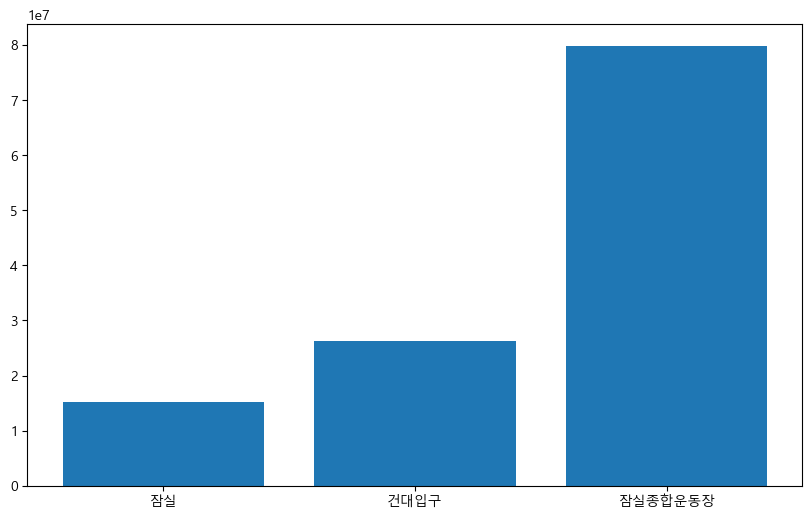

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 경로
file_path = 'hotplace_df_new.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='utf-8')

plt.figure(figsize=(10, 6))

# 그룹별 방문자수 합산
group_mapping = {
    '뚝섬-잠실': ['잠실', '건대입구', '잠실종합운동장'],
    '서울숲-잠원': ['압구정로데오거리', '서울숲', '성수동카페거리', '청담동 명품거리'],
    '여의도-이촌': ['이촌', '용산역', '여의도'],
    '망원-양화': ['망원시장'],
    '난지-양화': ['서울월드컵경기장', '선유도', '하늘공원']
}

bottom = None
for group, locations in group_mapping.items():
    temp_df = df[df['지자체'].isin(locations)]
    temp_sum = temp_df['방문자수'].sum()
    if bottom is None:
        plt.bar(locations, temp_df['방문자수'], label=group)
        bottom = temp_df['방문자수']
    else:
        plt.bar(locations, temp_df['방문자수'], bottom=bottom, label=group)
        bottom += temp_df['방문자수']

# 그래프 제목, 축 레이블 설정
plt.title('서울 주요 지역별 핫플레이스 방문자 수 (Stacked)')
plt.xlabel('지역')
plt.ylabel('방문자수')

# x축 라벨 회전
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 3 with shape (3,).

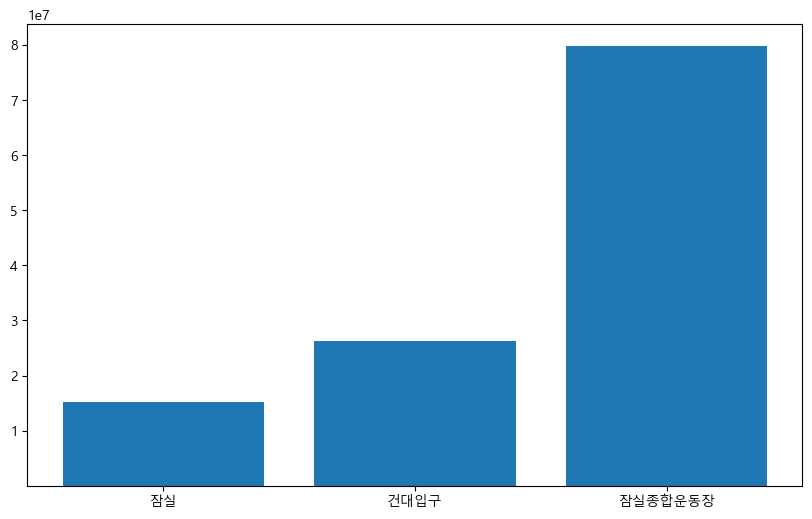

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 경로
file_path = 'hotplace_df_new.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='utf-8')

plt.figure(figsize=(10, 6))

# 그룹별 방문자수 합산
group_mapping = {
    '뚝섬-잠실': ['잠실', '건대입구', '잠실종합운동장'],
    '서울숲-잠원': ['압구정로데오거리', '서울숲', '성수동카페거리', '청담동 명품거리'],
    '여의도-이촌': ['이촌', '용산역', '여의도'],
    '망원-양화': ['망원시장'],
    '난지-양화': ['서울월드컵경기장', '선유도', '하늘공원']
}

bottom = None
for group, locations in group_mapping.items():
    temp_df = df[df['지자체'].isin(locations)]
    temp_sum = temp_df['방문자수'].sum()
    if bottom is None:
        plt.bar(locations, temp_df['방문자수'], label=group)
        bottom = temp_df['방문자수'].values
    else:
        plt.bar(locations, temp_df['방문자수'], bottom=bottom, label=group)
        bottom += temp_df['방문자수'].values

# 그래프 제목, 축 레이블 설정
plt.title('서울 주요 지역별 핫플레이스 방문자 수 (Stacked)')
plt.xlabel('지역')
plt.ylabel('방문자수')

# x축 라벨 회전
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 3 with shape (3,).

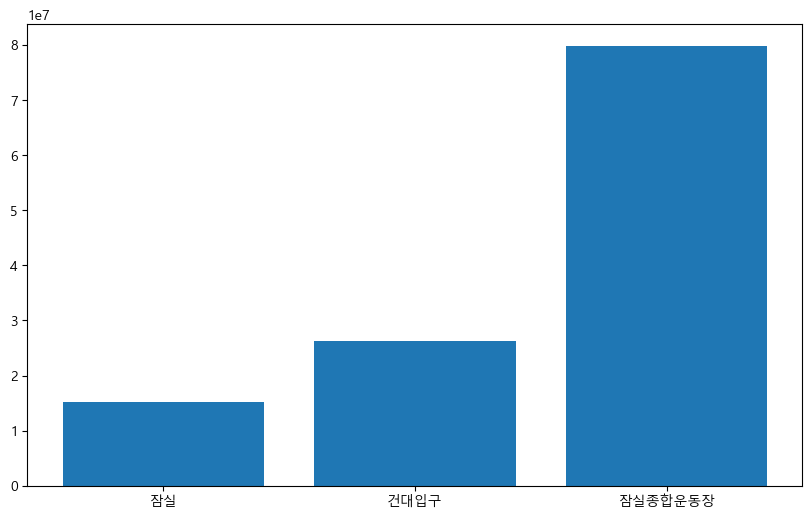

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 경로
file_path = 'hotplace_df_new.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='utf-8')

plt.figure(figsize=(10, 6))

# 그룹별 방문자수 합산
group_mapping = {
    '뚝섬-잠실': ['잠실', '건대입구', '잠실종합운동장'],
    '서울숲-잠원': ['압구정로데오거리', '서울숲', '성수동카페거리', '청담동 명품거리'],
    '여의도-이촌': ['이촌', '용산역', '여의도'],
    '망원-양화': ['망원시장'],
    '난지-양화': ['서울월드컵경기장', '선유도', '하늘공원']
}

bottom = None
for group, locations in group_mapping.items():
    temp_df = df[df['지자체'].isin(locations)]
    temp_sum = temp_df['방문자수'].sum()
    if bottom is None:
        plt.bar(locations, temp_df['방문자수'], label=group)
        bottom = temp_df['방문자수'].values
    else:
        plt.bar(locations, temp_df['방문자수'], bottom=bottom[:len(locations)], label=group)
        bottom += temp_df['방문자수'].values

# 그래프 제목, 축 레이블 설정
plt.title('서울 주요 지역별 핫플레이스 방문자 수 (Stacked)')
plt.xlabel('지역')
plt.ylabel('방문자수')

# x축 라벨 회전
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 프레임 생성
data = {
    '지자체': ['당산역', '스타필드 코엑스몰', '하늘공원', '서울숲', '압구정로데오거리', '압구정동', '양평2동', '여의도', '올림픽공원', '이태원', 
            '잠실종합운동장', '청담동 명품거리', '용산역', '한남동', '건대입구', '성수동카페거리', '잠실', '서울월드컵경기장', '망원시장',
            '뚝섬-잠실', '서울숲-잠원', '여의도-이촌', '망원-양화', '난지-양화'],
    '방문자수': [17252669, 45887936, 27383053, 14205346, 30794117, 38658994, 11687429, 77892780, 11854471, 12508862,
             15260255, 31968858, 52185259, 26310946, 26195500, 49315701, 79871475, 26543256, 22648788,
             121327230, 126284022, 130078039, 22648788, 53926309]
}

df = pd.DataFrame(data)

# 그룹별 방문자수 합산
group_mapping = {
    '뚝섬-잠실': ['잠실', '건대입구', '잠실종합운동장'],
    '서울숲-잠원': ['압구정로데오거리', '서울숲', '성수동카페거리', '청담동 명품거리'],
    '여의도-이촌': ['여의도', '용산역', '이촌'],
    '망원-양화': ['망원시장'],
    '난지-양화': ['서울월드컵경기장', '선유도', '하늘공원']
}

group_data = pd.DataFrame(columns=['지자체', '방문자수'])

for group, locations in group_mapping.items():
    temp_df = df[df['지자체'].isin(locations)]
    group_data = group_data.append({'지자체': group, '방문자수': temp_df['방문자수'].sum()}, ignore_index=True)

# stacked 막대 그래프 생성
plt.figure(figsize=(10, 6))
bottom = None

for i, group in enumerate(group_data['지자체']):
    temp_df = df[df['지자체'].isin(group_mapping[group])]
    if bottom is None:
        plt.bar(temp_df['지자체'], temp_df['방문자수'], label=group)
        bottom = temp_df['방문자수'].values
    else:
        plt.bar(temp_df['지자체'], temp_df['방문자수'], bottom=bottom, label=group)
        bottom += temp_df['방문자수'].values

# 그래프 제목, 축 레이블 설정
plt.title('서울 주요 지역별 핫플레이스 방문자 수 (Stacked)')
plt.xlabel('지역')
plt.ylabel('방문자수')

# x축 라벨 회전
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


AttributeError: 'DataFrame' object has no attribute 'append'

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 3 with shape (3,).

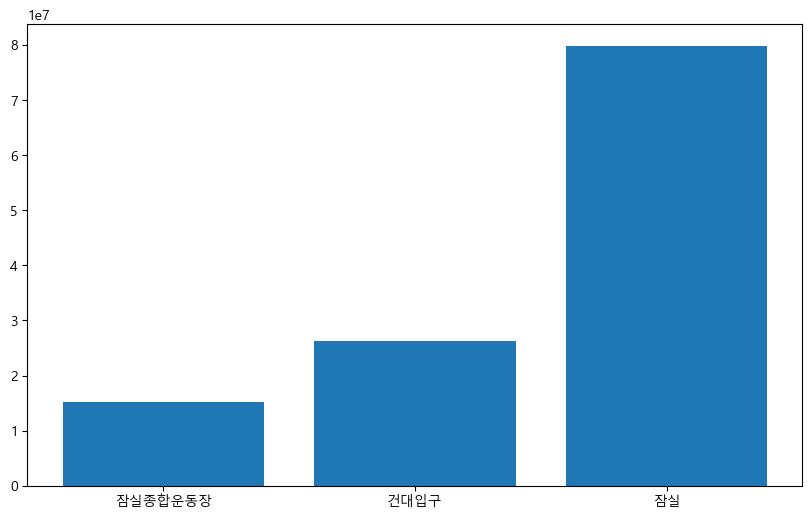

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 프레임 생성
data = {
    '지자체': ['당산역', '스타필드 코엑스몰', '하늘공원', '서울숲', '압구정로데오거리', '압구정동', '양평2동', '여의도', '올림픽공원', '이태원', 
            '잠실종합운동장', '청담동 명품거리', '용산역', '한남동', '건대입구', '성수동카페거리', '잠실', '서울월드컵경기장', '망원시장',
            '뚝섬-잠실', '서울숲-잠원', '여의도-이촌', '망원-양화', '난지-양화'],
    '방문자수': [17252669, 45887936, 27383053, 14205346, 30794117, 38658994, 11687429, 77892780, 11854471, 12508862,
             15260255, 31968858, 52185259, 26310946, 26195500, 49315701, 79871475, 26543256, 22648788,
             121327230, 126284022, 130078039, 22648788, 53926309]
}

df = pd.DataFrame(data)

# 그룹별 방문자수 합산
group_mapping = {
    '뚝섬-잠실': ['잠실', '건대입구', '잠실종합운동장'],
    '서울숲-잠원': ['압구정로데오거리', '서울숲', '성수동카페거리', '청담동 명품거리'],
    '여의도-이촌': ['여의도', '용산역', '이촌'],
    '망원-양화': ['망원시장'],
    '난지-양화': ['서울월드컵경기장', '선유도', '하늘공원']
}

group_data = []

for group, locations in group_mapping.items():
    temp_df = df[df['지자체'].isin(locations)]
    group_data.append({'지자체': group, '방문자수': temp_df['방문자수'].sum()})

# stacked 막대 그래프 생성
plt.figure(figsize=(10, 6))
bottom = None

for i, group_info in enumerate(group_data):
    group = group_info['지자체']
    group_total_visitors = group_info['방문자수']
    temp_df = df[df['지자체'].isin(group_mapping[group])]
    if bottom is None:
        plt.bar(temp_df['지자체'], temp_df['방문자수'], label=group)
        bottom = temp_df['방문자수'].values
    else:
        plt.bar(temp_df['지자체'], temp_df['방문자수'], bottom=bottom, label=group)
        bottom += temp_df['방문자수'].values

# 그래프 제목, 축 레이블 설정
plt.title('서울 주요 지역별 핫플레이스 방문자 수 (Stacked)')
plt.xlabel('지역')
plt.ylabel('방문자수')

# x축 라벨 회전
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


In [39]:
print(df['지자체'].unique())


['당산역' '스타필드 코엑스몰' '하늘공원' '서울숲' '압구정로데오거리' '압구정동' '양평2동' '여의도' '올림픽공원'
 '이태원' '잠실종합운동장' '청담동 명품거리' '용산역' '한남동' '건대입구' '성수동카페거리' '잠실' '서울월드컵경기장'
 '망원시장' '뚝섬-잠실' '서울숲-잠원' '여의도-이촌' '망원-양화' '난지-양화']


AttributeError: Rectangle.set() got an unexpected keyword argument 'stacked'

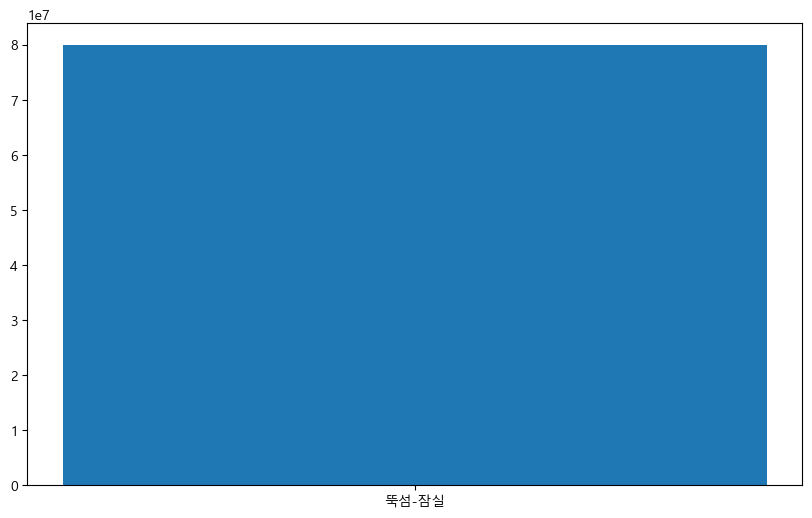

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 경로
file_path = 'hotplace_df_new.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='utf-8')

plt.figure(figsize=(10, 6))

# '뚝섬-잠실' 그룹 데이터 필터링
group_name = '뚝섬-잠실'
locations = ['잠실', '건대입구', '잠실종합운동장']

# 장소 이름에 포함된 공백 제거
temp_df = df[df['지자체'].str.strip().isin(locations)]

# 막대 그래프 생성
plt.bar(group_name, temp_df['방문자수'], label=locations[0])
bottom = temp_df['방문자수']
for location in locations[1:]:
    plt.bar(group_name, temp_df[temp_df['지자체'].str.strip() == location]['방문자수'], bottom=bottom, label=location, stacked=True)
    bottom += temp_df[temp_df['지자체'].str.strip() == location]['방문자수']

# 그래프 제목, 축 레이블 설정
plt.title('서울 주요 지역별 핫플레이스 방문자 수 (Stacked)')
plt.xlabel('지역')
plt.ylabel('방문자수')

# x축 라벨 회전
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


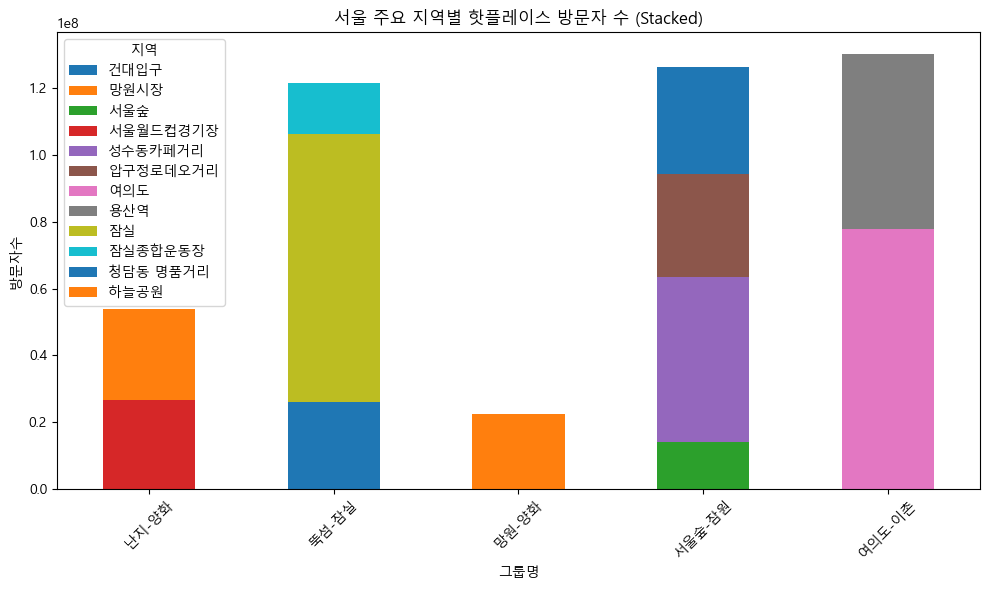

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 경로
file_path = 'hotplace_df_new.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='utf-8')

# 그룹별 방문자 수 합산
group_mapping = {
    '뚝섬-잠실': ['잠실', '건대입구', '잠실종합운동장'],
    '서울숲-잠원': ['압구정로데오거리', '서울숲', '성수동카페거리', '청담동 명품거리'],
    '여의도-이촌': ['이촌', '용산역', '여의도'],
    '망원-양화': ['망원시장'],
    '난지-양화': ['서울월드컵경기장', '선유도', '하늘공원']
}

# 각 그룹의 데이터 프레임을 쌓아줌
stacked_df = pd.DataFrame()
for group, locations in group_mapping.items():
    temp_df = df[df['지자체'].isin(locations)]
    stacked_df = pd.concat([stacked_df, temp_df])

# 지역명을 그룹명으로 변경
stacked_df['그룹명'] = stacked_df['지자체'].map({location: group for group, locations in group_mapping.items() for location in locations})

# 데이터를 피벗하여 막대 그래프로 그림
pivot_df = stacked_df.pivot_table(index='그룹명', columns='지자체', values='방문자수', aggfunc='sum')
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# 그래프 제목, 축 레이블 설정
plt.title('서울 주요 지역별 핫플레이스 방문자 수 (Stacked)')
plt.xlabel('그룹명')
plt.ylabel('방문자수')

# x축 라벨 회전
plt.xticks(rotation=45)

# 범례 표시
plt.legend(title='지역')

# 그래프 출력
plt.tight_layout()
plt.show()


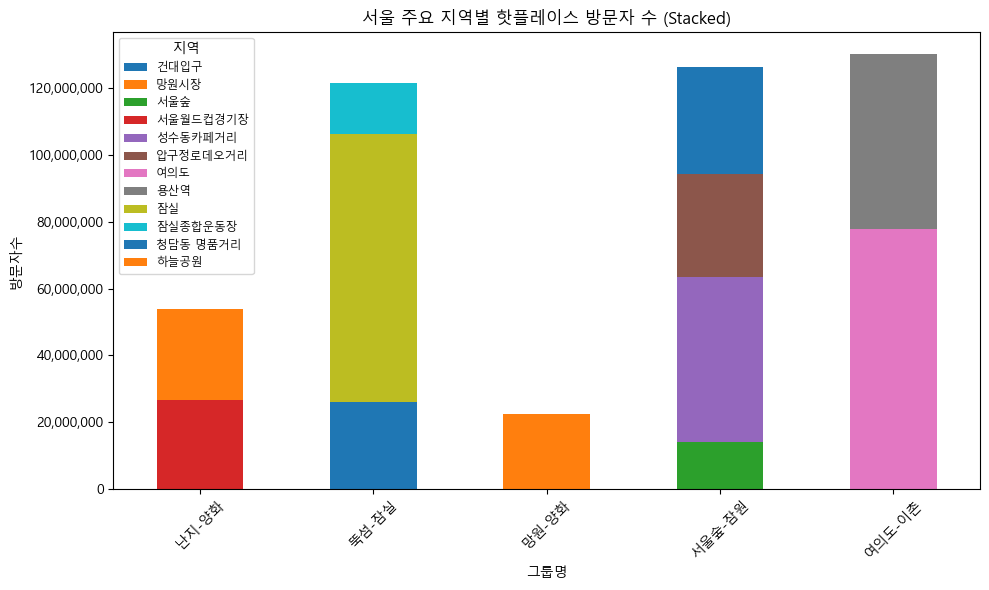

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 경로
file_path = 'hotplace_df_new.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='utf-8')

# 그룹별 방문자 수 합산
group_mapping = {
    '뚝섬-잠실': ['잠실', '건대입구', '잠실종합운동장'],
    '서울숲-잠원': ['압구정로데오거리', '서울숲', '성수동카페거리', '청담동 명품거리'],
    '여의도-이촌': ['이촌', '용산역', '여의도'],
    '망원-양화': ['망원시장'],
    '난지-양화': ['서울월드컵경기장', '선유도', '하늘공원']
}

# 각 그룹의 데이터 프레임을 쌓아줌
stacked_df = pd.DataFrame()
for group, locations in group_mapping.items():
    temp_df = df[df['지자체'].isin(locations)]
    stacked_df = pd.concat([stacked_df, temp_df])

# 지역명을 그룹명으로 변경
stacked_df['그룹명'] = stacked_df['지자체'].map({location: group for group, locations in group_mapping.items() for location in locations})

# 데이터를 피벗하여 막대 그래프로 그림
pivot_df = stacked_df.pivot_table(index='그룹명', columns='지자체', values='방문자수', aggfunc='sum')
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# 그래프 제목, 축 레이블 설정
plt.title('서울 주요 지역별 핫플레이스 방문자 수 (Stacked)')
plt.xlabel('그룹명')
plt.ylabel('방문자수')

# x축 라벨 회전
plt.xticks(rotation=45)

# 범례 크기 조절
plt.legend(title='지역', fontsize='small')

# y축을 실제 방문자수 수치로 변경
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# 그래프 출력
plt.tight_layout()
plt.show()


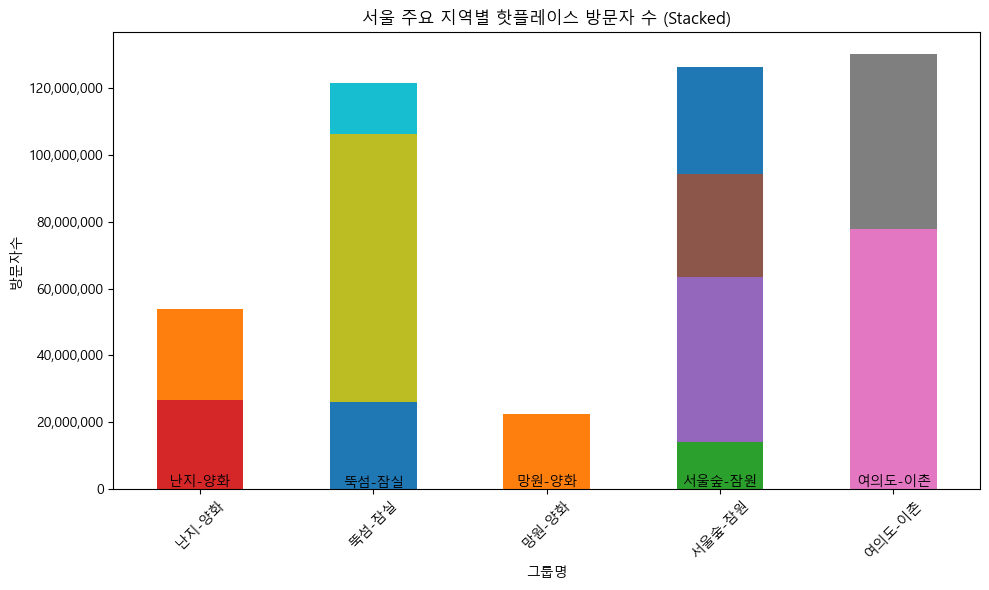

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 경로
file_path = 'hotplace_df_new.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='cp949')

# 그룹별 방문자 수 합산
group_mapping = {
    '뚝섬-잠실': ['잠실', '건대입구', '잠실종합운동장'],
    '서울숲-잠원': ['압구정로데오거리', '서울숲', '성수동카페거리', '청담동 명품거리'],
    '여의도-이촌': ['이촌', '용산역', '여의도'],
    '망원-양화': ['망원시장'],
    '난지-양화': ['서울월드컵경기장', '선유도', '하늘공원']
}

# 각 그룹의 데이터 프레임을 쌓아줌
stacked_df = pd.DataFrame()
for group, locations in group_mapping.items():
    temp_df = df[df['지자체'].isin(locations)]
    stacked_df = pd.concat([stacked_df, temp_df])

# 지역명을 그룹명으로 변경
stacked_df['그룹명'] = stacked_df['지자체'].map({location: group for group, locations in group_mapping.items() for location in locations})

# 데이터를 피벗하여 막대 그래프로 그림
pivot_df = stacked_df.pivot_table(index='그룹명', columns='지자체', values='방문자수', aggfunc='sum')
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# 그래프 제목, 축 레이블 설정
plt.title('서울 주요 지역별 핫플레이스 방문자 수 (Stacked)')
plt.xlabel('그룹명')
plt.ylabel('방문자수')

# x축 라벨 회전
plt.xticks(rotation=45)

# y축을 실제 방문자수 수치로 변경
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# 각 막대 그래프 영역에 '지역' 표시
for idx, label in enumerate(pivot_df.index):
    plt.text(idx, 0, label, ha='center', va='bottom')

# 범례 제거
ax.legend().set_visible(False)

# 그래프 출력
plt.tight_layout()
plt.show()


KeyError: '선유도'

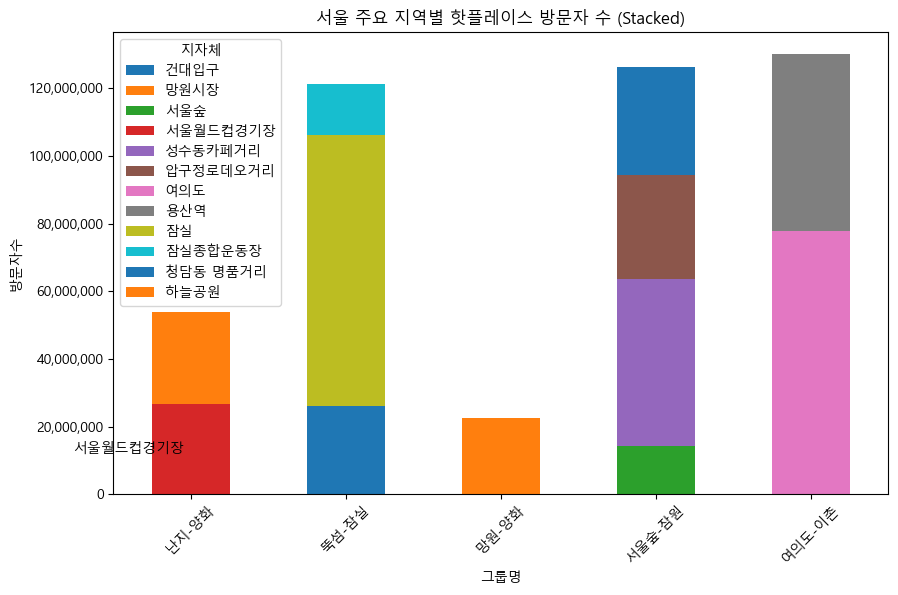

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 경로
file_path = 'hotplace_df_new.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='cp949')

# 그룹별 방문자 수 합산
group_mapping = {
    '뚝섬-잠실': ['잠실', '건대입구', '잠실종합운동장'],
    '서울숲-잠원': ['압구정로데오거리', '서울숲', '성수동카페거리', '청담동 명품거리'],
    '여의도-이촌': ['이촌', '용산역', '여의도'],
    '망원-양화': ['망원시장'],
    '난지-양화': ['서울월드컵경기장', '선유도', '하늘공원']
}

# 그룹명과 해당 지역들을 매핑하는 딕셔너리 생성
location_mapping = {}
for group, locations in group_mapping.items():
    for location in locations:
        location_mapping[location] = group

# 각 그룹의 데이터 프레임을 쌓아줌
stacked_df = pd.DataFrame()
for group, locations in group_mapping.items():
    temp_df = df[df['지자체'].isin(locations)]
    stacked_df = pd.concat([stacked_df, temp_df])

# 지역명을 그룹명으로 변경
stacked_df['그룹명'] = stacked_df['지자체'].map(location_mapping)

# 데이터를 피벗하여 막대 그래프로 그림
pivot_df = stacked_df.pivot_table(index='그룹명', columns='지자체', values='방문자수', aggfunc='sum')
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# 그래프 제목, 축 레이블 설정
plt.title('서울 주요 지역별 핫플레이스 방문자 수 (Stacked)')
plt.xlabel('그룹명')
plt.ylabel('방문자수')

# x축 라벨 회전
plt.xticks(rotation=45)

# y축을 실제 방문자수 수치로 변경
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# 각 막대 그래프 영역에 지역 표시
for idx, group in enumerate(pivot_df.index):
    locations = group_mapping[group]
    x_offset = idx - 0.2 * (len(locations) - 1)
    for loc in locations:
        plt.text(x_offset, pivot_df[loc].sum() / 2, loc, ha='center', va='center')
        x_offset += 0.4

# 각 영역별로 수치 표시
for idx, group in enumerate(pivot_df.index):
    total = pivot_df.loc[group].sum()
    plt.text(idx, total, f'{total:,.0f}', ha='center', va='bottom')

# 범례 제거
ax.legend().set_visible(False)

# 그래프 출력
plt.tight_layout()
plt.show()


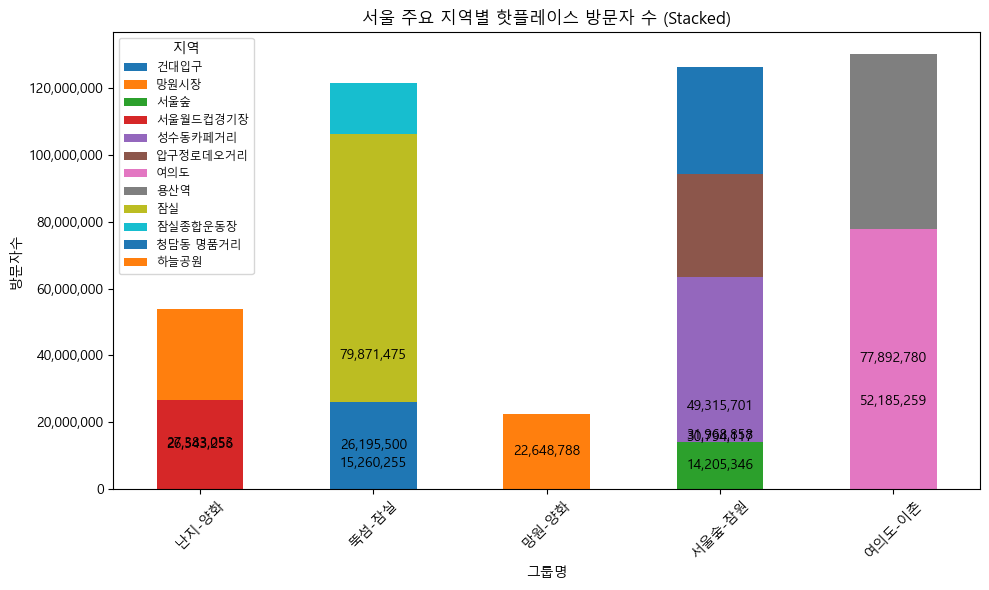

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 경로
file_path = 'hotplace_df_new.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='cp949')

# 그룹별 방문자 수 합산
group_mapping = {
    '뚝섬-잠실': ['잠실', '건대입구', '잠실종합운동장'],
    '서울숲-잠원': ['압구정로데오거리', '서울숲', '성수동카페거리', '청담동 명품거리'],
    '여의도-이촌': ['용산역', '여의도'],
    '망원-양화': ['망원시장'],
    '난지-양화': ['서울월드컵경기장', '하늘공원']
}

# 각 그룹의 데이터 프레임을 쌓아줌
stacked_df = pd.DataFrame()
for group, locations in group_mapping.items():
    temp_df = df[df['지자체'].isin(locations)]
    stacked_df = pd.concat([stacked_df, temp_df])

# 지역명을 그룹명으로 변경
stacked_df['그룹명'] = stacked_df['지자체'].map({location: group for group, locations in group_mapping.items() for location in locations})

# 데이터를 피벗하여 막대 그래프로 그림
pivot_df = stacked_df.pivot_table(index='그룹명', columns='지자체', values='방문자수', aggfunc='sum')
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# 그래프 제목, 축 레이블 설정
plt.title('서울 주요 지역별 핫플레이스 방문자 수 (Stacked)')
plt.xlabel('그룹명')
plt.ylabel('방문자수')

# x축 라벨 회전
plt.xticks(rotation=45)

# 범례 크기 조절
plt.legend(title='지역', fontsize='small')

# y축을 실제 방문자수 수치로 변경
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# 각 막대 영역 안에 지역별 방문자 수 표시
for idx, group in enumerate(pivot_df.index):
    locations = group_mapping[group]
    x_offset = idx - 0.2 * (len(locations) - 1)
    for loc in locations:
        plt.text(idx, pivot_df[loc].sum() / 2, f'{pivot_df[loc].sum():,.0f}', ha='center', va='center')
        x_offset += 0.4

# 그래프 출력
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

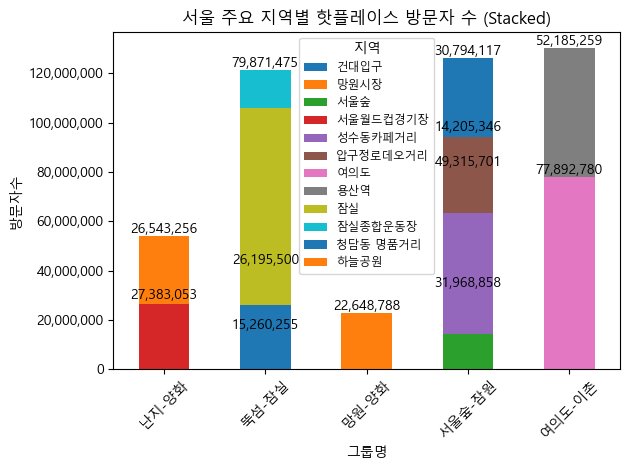

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 경로
file_path = 'hotplace_df_new.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='cp949')

# 그룹별 방문자 수 합산
group_mapping = {
    '뚝섬-잠실': ['잠실', '건대입구', '잠실종합운동장'],
    '서울숲-잠원': ['압구정로데오거리', '서울숲', '성수동카페거리', '청담동 명품거리'],
    '여의도-이촌': ['용산역', '여의도'],
    '망원-양화': ['망원시장'],
    '난지-양화': ['서울월드컵경기장', '하늘공원']
}

# 각 그룹의 데이터 프레임을 쌓아줌
stacked_df = pd.DataFrame()
for group, locations in group_mapping.items():
    temp_df = df[df['지자체'].isin(locations)]
    stacked_df = pd.concat([stacked_df, temp_df])

# 지역명을 그룹명으로 변경
stacked_df['그룹명'] = stacked_df['지자체'].map({location: group for group, locations in group_mapping.items() for location in locations})

# 데이터를 피벗하여 막대 그래프로 그림
pivot_df = stacked_df.pivot_table(index='그룹명', columns='지자체', values='방문자수', aggfunc='sum')

# 그래프 크기 조절
plt.figure(figsize=(12, 8))

ax = pivot_df.plot(kind='bar', stacked=True)

# 그래프 제목, 축 레이블 설정
plt.title('서울 주요 지역별 핫플레이스 방문자 수 (Stacked)')
plt.xlabel('그룹명')
plt.ylabel('방문자수')

# x축 라벨 회전
plt.xticks(rotation=45)

# 범례 크기 조절
plt.legend(title='지역', fontsize='small')

# y축을 실제 방문자수 수치로 변경
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# 각 막대 영역 상단에 지역별 방문자 수 표시
for idx, group in enumerate(pivot_df.index):
    locations = group_mapping[group]
    total_height = pivot_df.loc[group].sum()
    for loc in locations:
        height = pivot_df[loc].sum()
        plt.text(idx, total_height, f'{height:,.0f}', ha='center', va='bottom')
        total_height -= height

# 그래프 출력
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

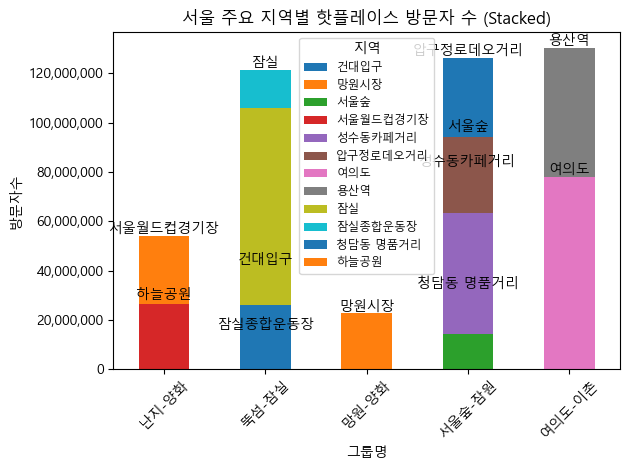

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 경로
file_path = 'hotplace_df_new.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='cp949')

# 그룹별 방문자 수 합산
group_mapping = {
    '뚝섬-잠실': ['잠실', '건대입구', '잠실종합운동장'],
    '서울숲-잠원': ['압구정로데오거리', '서울숲', '성수동카페거리', '청담동 명품거리'],
    '여의도-이촌': ['용산역', '여의도'],
    '망원-양화': ['망원시장'],
    '난지-양화': ['서울월드컵경기장', '하늘공원']
}

# 각 그룹의 데이터 프레임을 쌓아줌
stacked_df = pd.DataFrame()
for group, locations in group_mapping.items():
    temp_df = df[df['지자체'].isin(locations)]
    stacked_df = pd.concat([stacked_df, temp_df])

# 지역명을 그룹명으로 변경
stacked_df['그룹명'] = stacked_df['지자체'].map({location: group for group, locations in group_mapping.items() for location in locations})

# 데이터를 피벗하여 막대 그래프로 그림
pivot_df = stacked_df.pivot_table(index='그룹명', columns='지자체', values='방문자수', aggfunc='sum')

# 그래프 크기 조절
plt.figure(figsize=(12, 8))

ax = pivot_df.plot(kind='bar', stacked=True)

# 그래프 제목, 축 레이블 설정
plt.title('서울 주요 지역별 핫플레이스 방문자 수 (Stacked)')
plt.xlabel('그룹명')
plt.ylabel('방문자수')

# x축 라벨 회전
plt.xticks(rotation=45)

# 범례 크기 조절
plt.legend(title='지역', fontsize='small')

# y축을 실제 방문자수 수치로 변경
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# 각 막대 영역 상단에 지역별 방문자 수 표시
for idx, group in enumerate(pivot_df.index):
    locations = group_mapping[group]
    total_height = pivot_df.loc[group].sum()
    for loc in locations:
        height = pivot_df[loc].sum()
        plt.text(idx, total_height, loc, ha='center', va='bottom')
        total_height -= height

# 그래프 출력
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

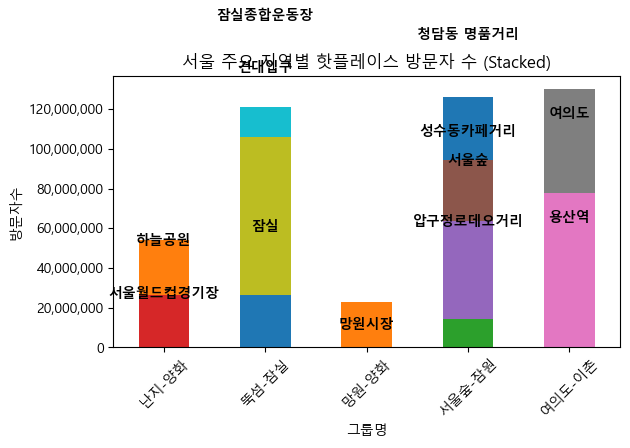

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 경로
file_path = 'hotplace_df_new.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='cp949')

# 그룹별 방문자 수 합산
group_mapping = {
    '뚝섬-잠실': ['잠실', '건대입구', '잠실종합운동장'],
    '서울숲-잠원': ['압구정로데오거리', '서울숲', '성수동카페거리', '청담동 명품거리'],
    '여의도-이촌': ['용산역', '여의도'],
    '망원-양화': ['망원시장'],
    '난지-양화': ['서울월드컵경기장', '하늘공원']
}

# 각 그룹의 데이터 프레임을 쌓아줌
stacked_df = pd.DataFrame()
for group, locations in group_mapping.items():
    temp_df = df[df['지자체'].isin(locations)]
    stacked_df = pd.concat([stacked_df, temp_df])

# 지역명을 그룹명으로 변경
stacked_df['그룹명'] = stacked_df['지자체'].map({location: group for group, locations in group_mapping.items() for location in locations})

# 데이터를 피벗하여 막대 그래프로 그림
pivot_df = stacked_df.pivot_table(index='그룹명', columns='지자체', values='방문자수', aggfunc='sum')

# 그래프 크기 조절
plt.figure(figsize=(12, 8))

ax = pivot_df.plot(kind='bar', stacked=True)

# 그래프 제목, 축 레이블 설정
plt.title('서울 주요 지역별 핫플레이스 방문자 수 (Stacked)')
plt.xlabel('그룹명')
plt.ylabel('방문자수')

# x축 라벨 회전
plt.xticks(rotation=45)

# 범례 제거
plt.legend().remove()

# y축을 실제 방문자수 수치로 변경
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# 각 막대 영역 중앙에 지역별 방문자 수 표시
for idx, group in enumerate(pivot_df.index):
    locations = group_mapping[group]
    total_height = pivot_df.loc[group].sum()
    height_offset = 0
    for loc in locations:
        height = pivot_df[loc].sum()
        plt.text(idx, total_height / 2 + height_offset, loc, ha='center', va='center', color='black', fontsize=10, weight='bold')
        height_offset += height

# 그래프 출력
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

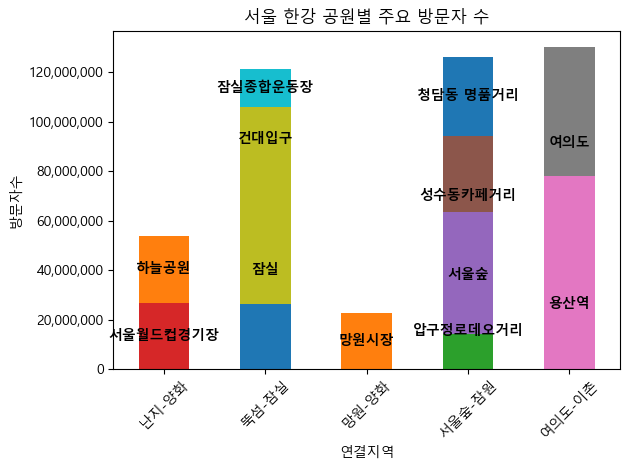

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 경로
file_path = 'hotplace_df_new.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='cp949')

# 그룹별 방문자 수 합산
group_mapping = {
    '뚝섬-잠실': ['잠실', '건대입구', '잠실종합운동장'],
    '서울숲-잠원': ['압구정로데오거리', '서울숲', '성수동카페거리', '청담동 명품거리'],
    '여의도-이촌': ['용산역', '여의도'],
    '망원-양화': ['망원시장'],
    '난지-양화': ['서울월드컵경기장', '하늘공원']
}

# 각 그룹의 데이터 프레임을 쌓아줌
stacked_df = pd.DataFrame()
for group, locations in group_mapping.items():
    temp_df = df[df['지자체'].isin(locations)]
    stacked_df = pd.concat([stacked_df, temp_df])

# 지역명을 그룹명으로 변경
stacked_df['그룹명'] = stacked_df['지자체'].map({location: group for group, locations in group_mapping.items() for location in locations})

# 데이터를 피벗하여 막대 그래프로 그림
pivot_df = stacked_df.pivot_table(index='그룹명', columns='지자체', values='방문자수', aggfunc='sum')

# 그래프 크기 조절
plt.figure(figsize=(12, 8))

ax = pivot_df.plot(kind='bar', stacked=True)

# 그래프 제목, 축 레이블 설정
plt.title('서울 한강 공원별 주요 방문자 수')
plt.xlabel('연결지역')
plt.ylabel('방문자수')

# x축 라벨 회전
plt.xticks(rotation=45)

# 범례 제거
plt.legend().remove()

# y축을 실제 방문자수 수치로 변경
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# 각 막대 영역 중앙에 지역별 방문자 수 표시
for idx, group in enumerate(pivot_df.index):
    locations = group_mapping[group]
    total_height = pivot_df.loc[group].sum()
    height_offset = 0
    for loc in locations:
        height = pivot_df[loc].sum()
        plt.text(idx, height_offset + height / 2, loc, ha='center', va='center', color='black', fontsize=10, weight='bold')
        height_offset += height

# 그래프 출력
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

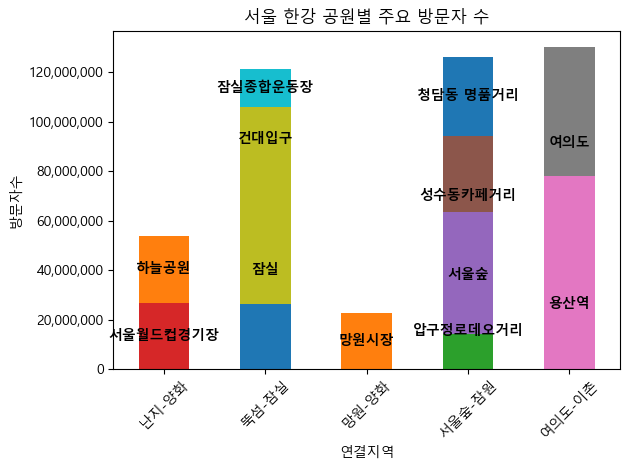

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 경로
file_path = 'hotplace_df_new.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='cp949')

# 그룹별 방문자 수 합산
group_mapping = {
    '뚝섬-잠실': ['잠실', '건대입구', '잠실종합운동장'],
    '서울숲-잠원': ['압구정로데오거리', '서울숲', '성수동카페거리', '청담동 명품거리'],
    '여의도-이촌': ['용산역', '여의도'],
    '망원-양화': ['망원시장'],
    '난지-양화': ['서울월드컵경기장', '하늘공원']
}

# 각 그룹의 데이터 프레임을 쌓아줌
stacked_df = pd.DataFrame()
for group, locations in group_mapping.items():
    temp_df = df[df['지자체'].isin(locations)]
    stacked_df = pd.concat([stacked_df, temp_df])

# 지역명을 그룹명으로 변경
stacked_df['그룹명'] = stacked_df['지자체'].map({location: group for group, locations in group_mapping.items() for location in locations})

# 데이터를 피벗하여 막대 그래프로 그림
pivot_df = stacked_df.pivot_table(index='그룹명', columns='지자체', values='방문자수', aggfunc='sum')

# 그래프 크기 조절
plt.figure(figsize=(12, 8))

ax = pivot_df.plot(kind='bar', stacked=True)

# 그래프 제목, 축 레이블 설정
plt.title('서울 한강 공원별 주요 방문자 수')
plt.xlabel('연결지역')
plt.ylabel('방문자수')

# x축 라벨 회전
plt.xticks(rotation=45)

# 범례 제거
plt.legend().remove()

# y축을 실제 방문자수 수치로 변경
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# 각 막대 영역 중앙에 지역 표시
for idx, group in enumerate(pivot_df.index):
    locations = group_mapping[group]
    total_height = pivot_df.loc[group].sum()
    height_offset = 0
    for loc in locations:
        height = pivot_df[loc].sum()
        plt.text(idx, height_offset + height / 2, loc, ha='center', va='center', color='black', fontsize=10, weight='bold')
        height_offset += height

# 그래프 출력
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

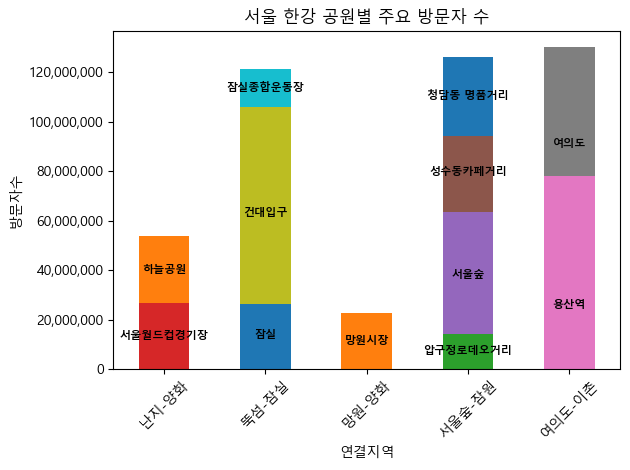

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 'Malgun Gothic' 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 경로
file_path = 'hotplace_df_new.csv'

# 파일을 utf-8 인코딩으로 읽기
df = pd.read_csv(file_path, encoding='cp949')

# 그룹별 방문자 수 합산
group_mapping = {
    '뚝섬-잠실': ['잠실', '건대입구', '잠실종합운동장'],
    '서울숲-잠원': ['압구정로데오거리', '서울숲', '성수동카페거리', '청담동 명품거리'],
    '여의도-이촌': ['용산역', '여의도'],
    '망원-양화': ['망원시장'],
    '난지-양화': ['서울월드컵경기장', '하늘공원']
}

# 각 그룹의 데이터 프레임을 쌓아줌
stacked_df = pd.DataFrame()
for group, locations in group_mapping.items():
    temp_df = df[df['지자체'].isin(locations)]
    stacked_df = pd.concat([stacked_df, temp_df])

# 지역명을 그룹명으로 변경
stacked_df['그룹명'] = stacked_df['지자체'].map({location: group for group, locations in group_mapping.items() for location in locations})

# 데이터를 피벗하여 막대 그래프로 그림
pivot_df = stacked_df.pivot_table(index='그룹명', columns='지자체', values='방문자수', aggfunc='sum')

# 그래프 크기 조절
plt.figure(figsize=(12, 8))

ax = pivot_df.plot(kind='bar', stacked=True)

# 그래프 제목, 축 레이블 설정
plt.title('서울 한강 공원별 주요 방문자 수')
plt.xlabel('연결지역')
plt.ylabel('방문자수')

# x축 라벨 회전
plt.xticks(rotation=45)

# 범례 제거
plt.legend().remove()

# y축을 실제 방문자수 수치로 변경
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# 각 막대 영역 중앙에 지역 표시
for idx, group in enumerate(pivot_df.index):
    locations = group_mapping[group]
    total_height = pivot_df.loc[group].sum()
    height_offset = 0
    for loc in locations:
        height = pivot_df[loc].sum()
        if loc == '잠실':
            plt.text(idx, height_offset + height / 2 - 26000000, loc, ha='center', va='center', color='black', fontsize=8, weight='bold')
        elif loc == '건대입구':
              plt.text(idx, height_offset + height / 2 - 30000000, loc, ha='center', va='center', color='black', fontsize=8, weight='bold')
        elif loc == '압구정로데오거리':
              plt.text(idx, height_offset + height / 2 - 8000000, loc, ha='center', va='center', color='black', fontsize=8, weight='bold')
        elif loc == '성수동카페거리':
              plt.text(idx, height_offset + height / 2 + 10000000, loc, ha='center', va='center', color='black', fontsize=8, weight='bold')
        else:
            plt.text(idx, height_offset + height / 2, loc, ha='center', va='center', color='black', fontsize=8, weight='bold')
        height_offset += height

# 그래프 출력
plt.tight_layout()
plt.show()
